    def PSO(num_cartoletas, [num_rodadas]):
        para num_rodada em num_rodadas:
            def desenvolve_rodada(num_rodada,num_cartoletas):
                formacao1 = def cria_time(formacao1,num_rodada,num_cartoletas)
                formacao2 = def cria_time(formacao2,num_rodada,num_cartoletas)
                formacao3 = def cria_time(formacao3,num_rodada,num_cartoletas)
                formacao4 = def cria_time(formacao4,num_rodada,num_cartoletas)
                formacao5 = def cria_time(formacao5,num_rodada,num_cartoletas)
                formacao6 = def cria_time(formacao6,num_rodada,num_cartoletas)
                formacao7 = def cria_time(formacao7,num_rodada,num_cartoletas)
                
                retorna custo,pontuacao,time do máximo entre as formações
        retorna times de cada rodada

    def cria_time(formacao,num_rodada,num_cartoletas):
        PSO para criar o time
        retorna time

In [15]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import math

In [16]:
jogadores = pd.read_csv("caRtola/data/desafio_valorizacao/valorizacao_cartola_2018.csv")
jogadores = jogadores[['id','rodada','posicao','pontos','media_pontos','preco','status']]
jogadores.head()

id  rodada posicao  pontos  media_pontos  preco      status
0  36540      38     zag     0.0          1.55   5.74  Contundido
1  36540      37     zag     0.0          1.55   5.74  Contundido
2  36540      36     zag     0.0          1.55   5.74  Contundido
3  36540      35     zag     0.0          1.55   5.74  Contundido
4  36540      34     zag     0.0          1.55   5.74  Contundido

In [37]:
class Time:
    def __init__(self, formacao, time):
        self.formacao = formacao
        self.time = time
        self.preco = 0
        self.fit = 0
        self.real_fit = 0
        self.pbest = self
        self.pbest_fit = self.fit
        self.velocidade = [0]*12
        
    def calc_fit(self,jogadores_filt):
        pontos = 0
        for v in self.time:
            pontos += jogadores_filt.iloc[v]['media_pontos']
        self.fit = pontos
        return self.fit
    
    def calc_real_fit(self,jogadores_filt):
        r_pontos = 0
        for v in self.time:
            r_pontos += jogadores_filt.iloc[v]['pontos']
        self.real_fit = r_pontos
        return self.real_fit

    def calc_custo(self,jogadores_filt,aux=None):
        preco = 0
        if aux != None:
            for v in aux:
                preco += jogadores_filt.iloc[v]['preco']
            return preco
        for v in self.time:
            preco += jogadores_filt.iloc[v]['preco']
        self.preco = preco
        return self.preco
    
    def calc_velocidade(self,gbest):
        B = c1 + c2
        X = 2/(12-B-math.sqrt(abs(B**2-4*B)))
        tx_aprendizagem_1 = random.random()
        tx_aprendizagem_2 = random.random()
        for i in range(len(self.velocidade)):
            self.velocidade[i] = int(X*self.velocidade[i] + c1*tx_aprendizagem_1*(self.pbest.time[i]-self.time[i])+c2*tx_aprendizagem_2*(gbest.time[i]-self.time[i]))
    
    def update_pos(self,vmax,gbest,jogadores_filt):
        new_team = []
        aux = self.time.copy()
        for i in range(len(self.time)):
            if abs((self.time[i]+self.velocidade[i])-self.pbest.time[i]) < abs((self.time[i]+self.velocidade[i])-gbest.time[i]) and\
            abs((self.time[i]+self.velocidade[i])-self.pbest.time[i]) < self.velocidade[i] and\
            self.pbest.time[i] not in new_team:
                aux[i] = self.pbest.time[i]
            elif abs((self.time[i]+self.velocidade[i])-gbest.time[i]) < abs((self.time[i]+self.velocidade[i])-self.pbest.time[i]) and\
            abs((self.time[i]+self.velocidade[i])-gbest.time[i]) < self.velocidade[i] and\
            gbest.time[i] not in new_team:
                aux[i] = gbest.time[i]
            else:
                while (aux[i] in new_team == True):
                    pos = jogadores_filt.iloc[aux[i]]['posicao']
                    new = jogadores_filt.loc[jogadores_filt['posicao']==pos].sample(n = 1)
                    aux[i] = new['order']
            new_team.append(aux[i])
        preco = self.calc_custo(jogadores_filt,new_team)
        if preco <= num_cartoletas:
            self.time = new_team
    
def cria_particulas(formacao,jogadores_filt):
    particulas = []
    for i in range(num_particulas):
        time = []
        if formacao[0] == '4':
            zag = jogadores_filt.loc[jogadores_filt['posicao']=='zag'].sample(n = 2, replace = False)
            lat = jogadores_filt.loc[jogadores_filt['posicao']=='lat'].sample(n = 2, replace = False)
            time += zag['order'].tolist()+lat['order'].tolist()
        elif formacao[0] == '5':
            zag = jogadores_filt.loc[jogadores_filt['posicao']=='zag'].sample(n = 3, replace = False)
            lat = jogadores_filt.loc[jogadores_filt['posicao']=='lat'].sample(n = 2, replace = False)
            time += zag['order'].tolist()+lat['order'].tolist()
        else:
            defesa = jogadores_filt.loc[(jogadores_filt['posicao']=='zag')|(jogadores_filt['posicao']=='lat')].sample(n = 3, replace = False)
            time += defesa['order'].tolist()
        mei = jogadores_filt.loc[jogadores_filt['posicao']=='mei'].sample(n = int(formacao[1]), replace = False)
        time += mei['order'].tolist()
        
        ata = jogadores_filt.loc[jogadores_filt['posicao']=='ata'].sample(n = int(formacao[2]), replace = False)
        time += ata['order'].tolist()
        
        tec = jogadores_filt.loc[jogadores_filt['posicao']=='tec'].sample(n = 1, replace = False)
        time += tec['order'].tolist()
        
        gol = jogadores_filt.loc[jogadores_filt['posicao']=='gol'].sample(n = 1, replace = False)
        time += gol['order'].tolist()
        
        time_formado = Time(formacao,time)
        particulas.append(time_formado)
    return particulas

def retorna_time(formacao,jogadores_filt,vmax):
    gbest = Time('',[0]*12)
    gbest_fit = 0
    gbest_preco = 0
    particulas = cria_particulas(formacao,jogadores_filt)
    it = 0
    store = []
    while it < max_iteracoes:
        avg = 0
        for p in particulas:
            fit = p.calc_fit(jogadores_filt)
            preco = p.calc_custo(jogadores_filt)
            if fit > gbest_fit and preco <= num_cartoletas:
                gbest_fit = fit
                gbest = p
                gbest_preco = preco
                p.pbest = p
                p.pbest_fit = fit
            elif fit > p.pbest_fit and preco <= num_cartoletas:
                p.pbest = p
                p.pbest_fit = fit 
            avg += fit
        for p in particulas:
            p.calc_velocidade(gbest)
            p.update_pos(vmax,gbest,jogadores_filt)
        it += 1
        store.append(avg/num_particulas)
    final_frame = jogadores_filt.loc[jogadores_filt['order'].isin(gbest.time)]
    return gbest,store

def PSO():
    results = []
    for num_rodada in rodadas:
        max_team = None
        max_team_fit = 0
        jogadores_filt = jogadores.loc[(jogadores['rodada']==num_rodada) & (jogadores['status'] == 'Provável')]
        vmax = jogadores_filt['id'].count()
        jogadores_filt.insert(0, 'order', list(range(0,vmax)))
        for1,store1 = retorna_time('433',jogadores_filt,vmax)
        for2,store2 = retorna_time('442',jogadores_filt,vmax)
        for3,store3 = retorna_time('451',jogadores_filt,vmax)
        for4,store4 = retorna_time('352',jogadores_filt,vmax)
        for5,store5 = retorna_time('343',jogadores_filt,vmax)
        for6,store6 = retorna_time('532',jogadores_filt,vmax)
        for7,store7 = retorna_time('541',jogadores_filt,vmax)
        teams = [for1,for2,for3,for4,for5,for6,for7]
        for t in teams:
            if t.fit > max_team_fit:
                max_team = t
                max_team_fit = t.fit
        max_team.calc_real_fit(jogadores_filt)
        results.append(max_team)
        
        df=pd.DataFrame({'x':range(0,max_iteracoes),'433':store1,'442':store2,'451':store3,'352':store4,'343':store5,'532':store6,'541':store7})
        plt.plot( 'x', '433', data=df, marker='o', markerfacecolor='b', markersize=5, color='b', linewidth=2)
        plt.plot( 'x', '442', data=df, marker='v', markerfacecolor='g', markersize=5, color='g', linewidth=2)
        plt.plot( 'x', '451', data=df, marker='1', markerfacecolor='r', markersize=5, color='r', linewidth=2)
        plt.plot( 'x', '352', data=df, marker='2', markerfacecolor='c', markersize=5, color='c', linewidth=2)
        plt.plot( 'x', '343', data=df, marker='p', markerfacecolor='m', markersize=5, color='m', linewidth=2)
        plt.plot( 'x', '532', data=df, marker='x', markerfacecolor='y', markersize=5, color='y', linewidth=2)
        plt.plot( 'x', '541', data=df, marker='d', markerfacecolor='k', markersize=5, color='k', linewidth=2)
        plt.title('Progressão da fitness média das partículas durante a rodada '+str(num_rodada))
        plt.legend()
        plt.show()
        print('Resultados da rodada',num_rodada)
        print('Pontuação Máxima:',round(max_team.fit,2),'| Custo:',round(max_team.preco,2),'| Formação:',max_team.formacao)
        print('---------------------------------------------------------------------------')
        
    return results

### Experimento 1 - avaliando a influência do número de partículas

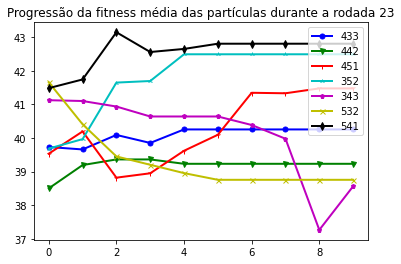

Resultados da rodada 23
Pontuação Máxima: 48.09 | Custo: 88.95 | Formação: 433
Pontuação real: 0
---------------------------------------------------------------------------


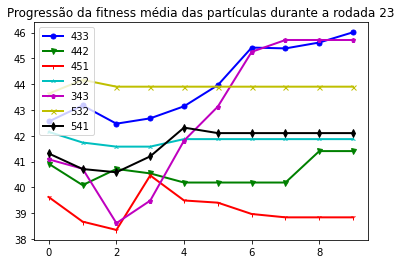

Resultados da rodada 23
Pontuação Máxima: 48.24 | Custo: 85.65 | Formação: 343
Pontuação real: 0
---------------------------------------------------------------------------


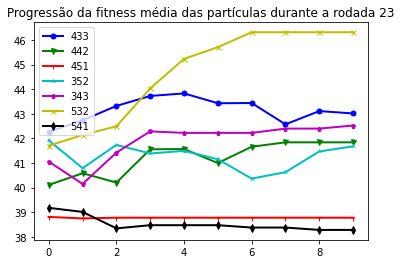

Resultados da rodada 23
Pontuação Máxima: 49.88 | Custo: 88.5 | Formação: 532
Pontuação real: 0
---------------------------------------------------------------------------


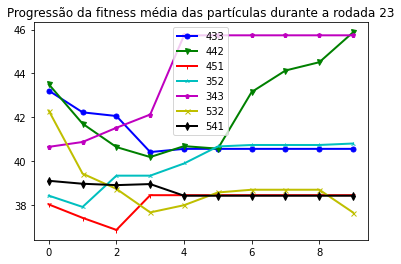

Resultados da rodada 23
Pontuação Máxima: 51.11 | Custo: 88.03 | Formação: 442
Pontuação real: 0
---------------------------------------------------------------------------


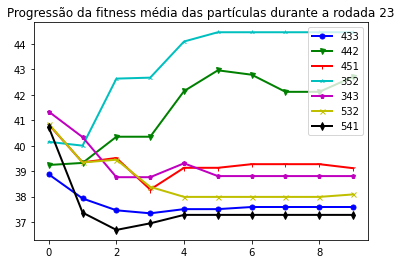

Resultados da rodada 23
Pontuação Máxima: 47.53 | Custo: 85.39 | Formação: 442
Pontuação real: 0
---------------------------------------------------------------------------


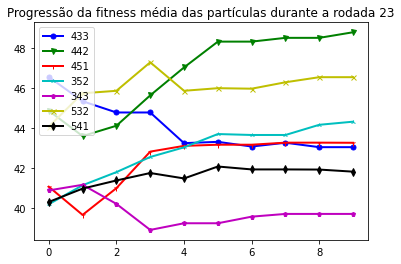

Resultados da rodada 23
Pontuação Máxima: 52.79 | Custo: 84.57 | Formação: 442
Pontuação real: 0
---------------------------------------------------------------------------


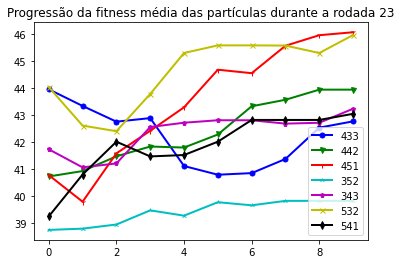

Resultados da rodada 23
Pontuação Máxima: 50.85 | Custo: 76.94 | Formação: 532
Pontuação real: 0
---------------------------------------------------------------------------


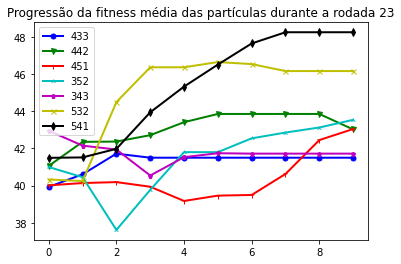

Resultados da rodada 23
Pontuação Máxima: 50.76 | Custo: 88.99 | Formação: 541
Pontuação real: 0
---------------------------------------------------------------------------


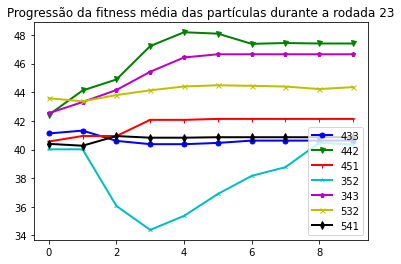

Resultados da rodada 23
Pontuação Máxima: 51.38 | Custo: 85.94 | Formação: 442
Pontuação real: 0
---------------------------------------------------------------------------


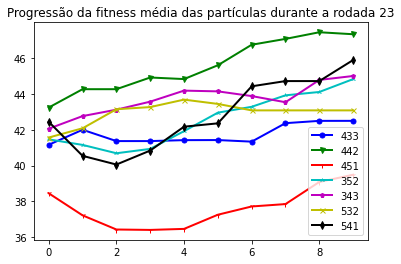

Resultados da rodada 23
Pontuação Máxima: 51.46 | Custo: 89.06 | Formação: 442
Pontuação real: 0
---------------------------------------------------------------------------
Média da pontuação: 50.209 | Desvio padrão da pontuação: 1.64
Média do custo: 86.202 | Desvio padrão do custo: 3.49


In [25]:
pts = []
custo = []
for i in range(10):
    num_cartoletas, rodadas, max_iteracoes, num_particulas, c1, c2 = 90, [23], 10, 10, 1, 1
    pso = PSO()
    pts.append(pso[0].fit)
    custo.append(pso[0].preco)
print('Média da pontuação:',sum(pts)/len(pts),'| Desvio padrão da pontuação:',round(np.std(pts),2))
print('Média do custo:',sum(custo)/len(custo),'| Desvio padrão do custo:',round(np.std(custo),2))

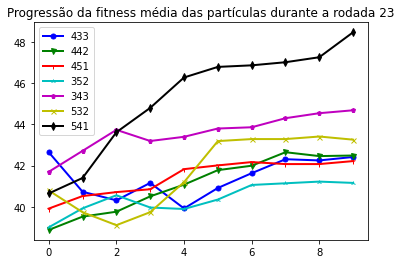

Resultados da rodada 23
Pontuação Máxima: 52.5 | Custo: 84.92 | Formação: 541
Pontuação real: 0
---------------------------------------------------------------------------


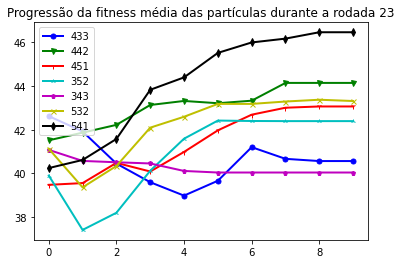

Resultados da rodada 23
Pontuação Máxima: 50.99 | Custo: 89.8 | Formação: 541
Pontuação real: 0
---------------------------------------------------------------------------


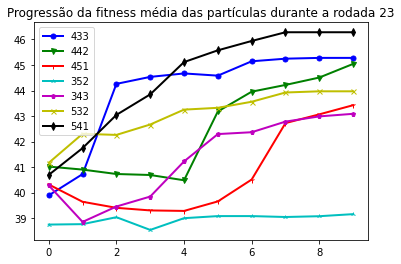

Resultados da rodada 23
Pontuação Máxima: 51.73 | Custo: 88.98 | Formação: 451
Pontuação real: 0
---------------------------------------------------------------------------


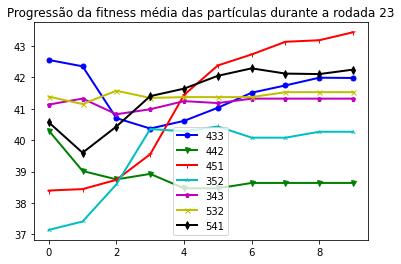

Resultados da rodada 23
Pontuação Máxima: 49.14 | Custo: 85.7 | Formação: 433
Pontuação real: 0
---------------------------------------------------------------------------


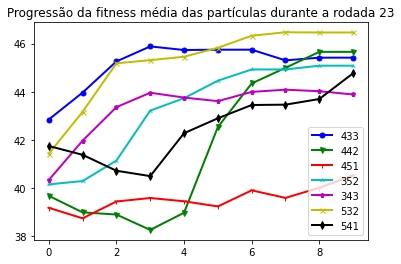

Resultados da rodada 23
Pontuação Máxima: 51.99 | Custo: 85.66 | Formação: 532
Pontuação real: 0
---------------------------------------------------------------------------


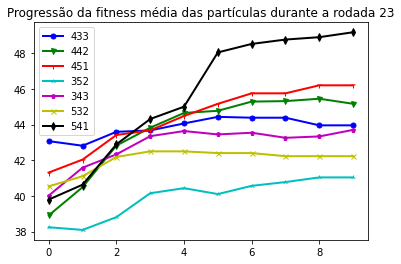

Resultados da rodada 23
Pontuação Máxima: 52.09 | Custo: 84.42 | Formação: 541
Pontuação real: 0
---------------------------------------------------------------------------


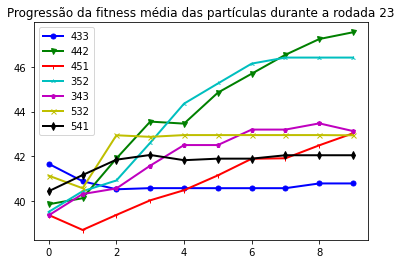

Resultados da rodada 23
Pontuação Máxima: 50.37 | Custo: 89.13 | Formação: 352
Pontuação real: 0
---------------------------------------------------------------------------


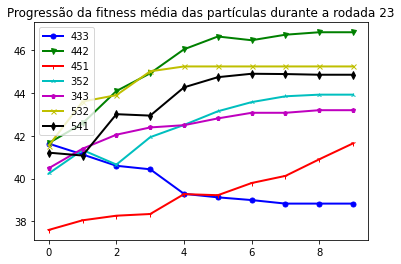

Resultados da rodada 23
Pontuação Máxima: 51.81 | Custo: 89.61 | Formação: 442
Pontuação real: 0
---------------------------------------------------------------------------


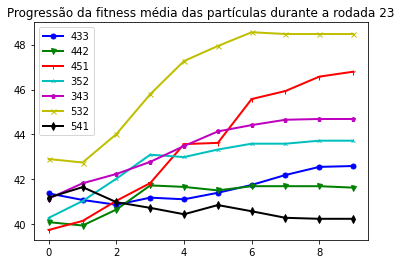

Resultados da rodada 23
Pontuação Máxima: 52.72 | Custo: 89.92 | Formação: 532
Pontuação real: 0
---------------------------------------------------------------------------


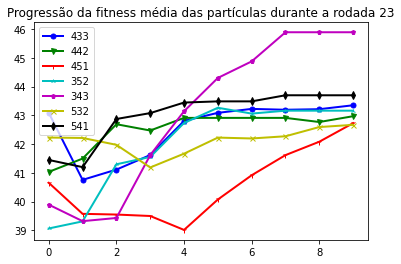

Resultados da rodada 23
Pontuação Máxima: 50.98 | Custo: 89.84 | Formação: 343
Pontuação real: 0
---------------------------------------------------------------------------
Média da pontuação: 51.432 | Desvio padrão da pontuação: 1.03
Média do custo: 87.798 | Desvio padrão do custo: 2.19


In [26]:
pts = []
custo = []
for i in range(10):
    num_cartoletas, rodadas, max_iteracoes, num_particulas, c1, c2 = 90, [23], 10, 20, 1, 1
    pso = PSO()
    pts.append(pso[0].fit)
    custo.append(pso[0].preco)
print('Média da pontuação:',sum(pts)/len(pts),'| Desvio padrão da pontuação:',round(np.std(pts),2))
print('Média do custo:',sum(custo)/len(custo),'| Desvio padrão do custo:',round(np.std(custo),2))

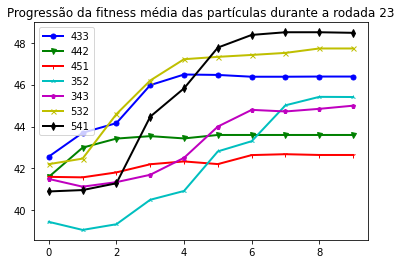

Resultados da rodada 23
Pontuação Máxima: 53.74 | Custo: 89.49 | Formação: 532
Pontuação real: 0
---------------------------------------------------------------------------


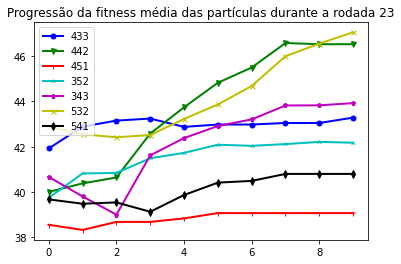

Resultados da rodada 23
Pontuação Máxima: 53.33 | Custo: 83.17 | Formação: 532
Pontuação real: 0
---------------------------------------------------------------------------


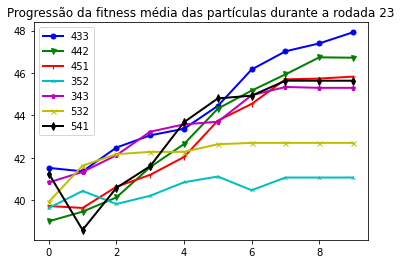

Resultados da rodada 23
Pontuação Máxima: 52.6 | Custo: 86.41 | Formação: 442
Pontuação real: 0
---------------------------------------------------------------------------


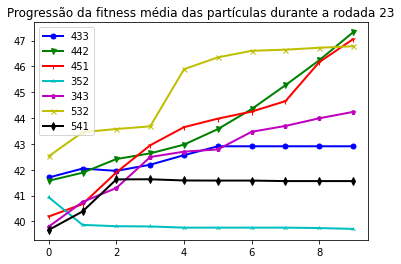

Resultados da rodada 23
Pontuação Máxima: 52.57 | Custo: 88.67 | Formação: 451
Pontuação real: 0
---------------------------------------------------------------------------


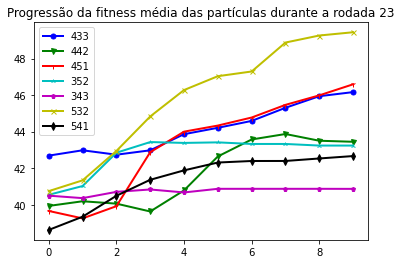

Resultados da rodada 23
Pontuação Máxima: 54.43 | Custo: 86.4 | Formação: 532
Pontuação real: 0
---------------------------------------------------------------------------


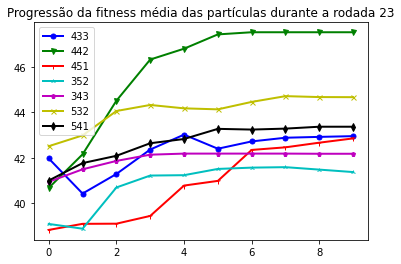

Resultados da rodada 23
Pontuação Máxima: 52.93 | Custo: 86.15 | Formação: 442
Pontuação real: 0
---------------------------------------------------------------------------


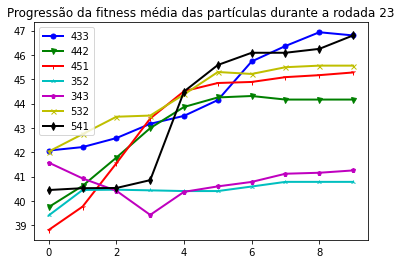

Resultados da rodada 23
Pontuação Máxima: 52.91 | Custo: 86.68 | Formação: 541
Pontuação real: 0
---------------------------------------------------------------------------


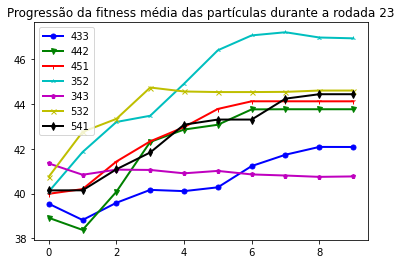

Resultados da rodada 23
Pontuação Máxima: 52.66 | Custo: 84.39 | Formação: 352
Pontuação real: 0
---------------------------------------------------------------------------


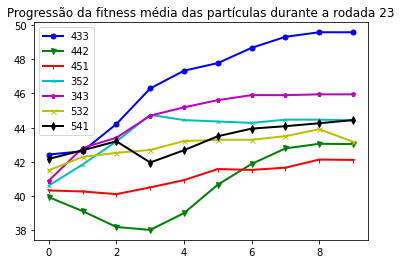

Resultados da rodada 23
Pontuação Máxima: 54.48 | Custo: 83.61 | Formação: 433
Pontuação real: 0
---------------------------------------------------------------------------


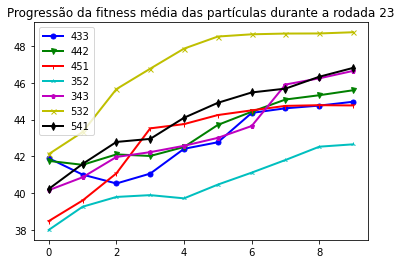

Resultados da rodada 23
Pontuação Máxima: 54.0 | Custo: 89.7 | Formação: 532
Pontuação real: 0
---------------------------------------------------------------------------
Média da pontuação: 53.364999999999995 | Desvio padrão da pontuação: 0.71
Média do custo: 86.46700000000001 | Desvio padrão do custo: 2.19


In [27]:
pts = []
custo = []
for i in range(10):
    num_cartoletas, rodadas, max_iteracoes, num_particulas, c1, c2 = 90, [23], 10, 30, 1, 1
    pso = PSO()
    pts.append(pso[0].fit)
    custo.append(pso[0].preco)
print('Média da pontuação:',sum(pts)/len(pts),'| Desvio padrão da pontuação:',round(np.std(pts),2))
print('Média do custo:',sum(custo)/len(custo),'| Desvio padrão do custo:',round(np.std(custo),2))

### Experimento 2 - avaliando a influência de c1 e c2

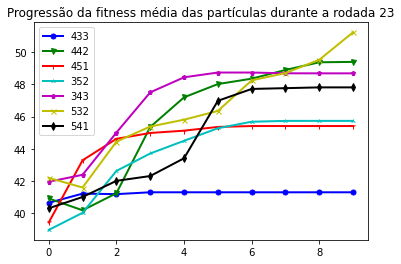

Resultados da rodada 23
Pontuação Máxima: 55.31 | Custo: 89.72 | Formação: 532
Pontuação real: 0
---------------------------------------------------------------------------


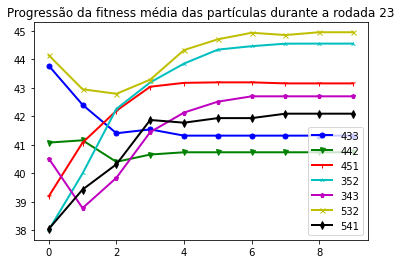

Resultados da rodada 23
Pontuação Máxima: 49.54 | Custo: 89.91 | Formação: 532
Pontuação real: 0
---------------------------------------------------------------------------


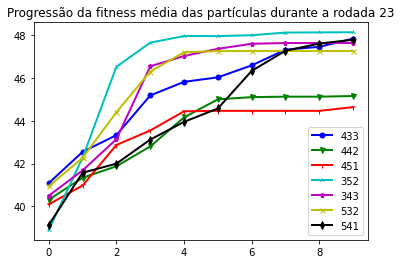

Resultados da rodada 23
Pontuação Máxima: 54.26 | Custo: 89.07 | Formação: 532
Pontuação real: 0
---------------------------------------------------------------------------


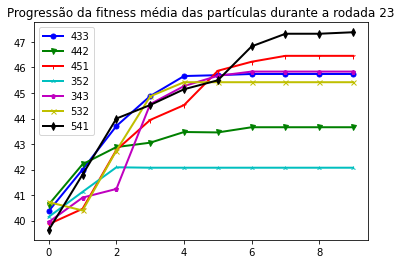

Resultados da rodada 23
Pontuação Máxima: 52.0 | Custo: 89.95 | Formação: 433
Pontuação real: 0
---------------------------------------------------------------------------


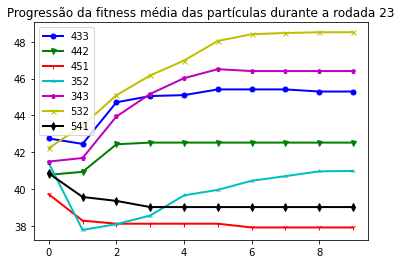

Resultados da rodada 23
Pontuação Máxima: 52.72 | Custo: 72.7 | Formação: 343
Pontuação real: 0
---------------------------------------------------------------------------


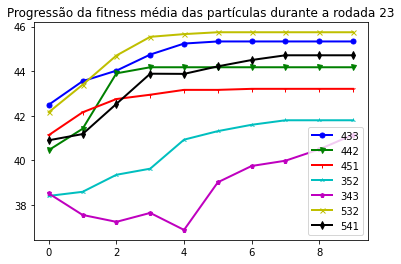

Resultados da rodada 23
Pontuação Máxima: 50.66 | Custo: 89.26 | Formação: 442
Pontuação real: 0
---------------------------------------------------------------------------


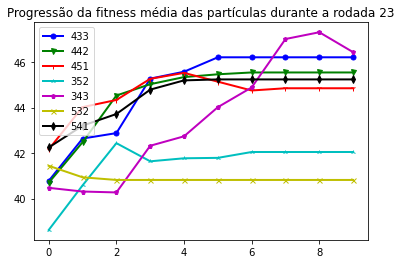

Resultados da rodada 23
Pontuação Máxima: 53.42 | Custo: 87.63 | Formação: 343
Pontuação real: 0
---------------------------------------------------------------------------


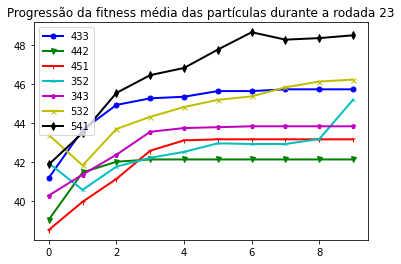

Resultados da rodada 23
Pontuação Máxima: 51.08 | Custo: 89.72 | Formação: 541
Pontuação real: 0
---------------------------------------------------------------------------


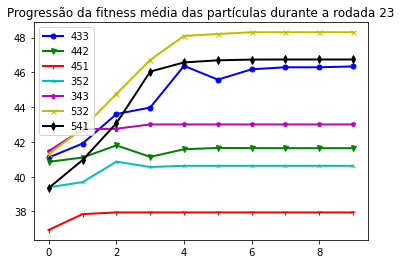

Resultados da rodada 23
Pontuação Máxima: 54.04 | Custo: 89.74 | Formação: 532
Pontuação real: 0
---------------------------------------------------------------------------


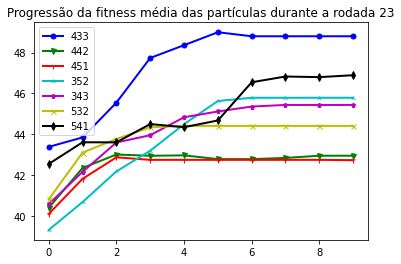

Resultados da rodada 23
Pontuação Máxima: 55.3 | Custo: 87.69 | Formação: 433
Pontuação real: 0
---------------------------------------------------------------------------
Média da pontuação: 52.833000000000006 | Desvio padrão da pontuação: 1.88
Média do custo: 87.53900000000002 | Desvio padrão do custo: 5.01


In [28]:
pts = []
custo = []
for i in range(10):
    num_cartoletas, rodadas, max_iteracoes, num_particulas, c1, c2 = 90, [23], 10, 30, 2.05, 2.05
    pso = PSO()
    pts.append(pso[0].fit)
    custo.append(pso[0].preco)
print('Média da pontuação:',sum(pts)/len(pts),'| Desvio padrão da pontuação:',round(np.std(pts),2))
print('Média do custo:',sum(custo)/len(custo),'| Desvio padrão do custo:',round(np.std(custo),2))

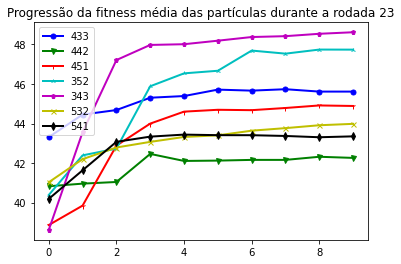

Resultados da rodada 23
Pontuação Máxima: 53.33 | Custo: 83.99 | Formação: 343
Pontuação real: 0
---------------------------------------------------------------------------


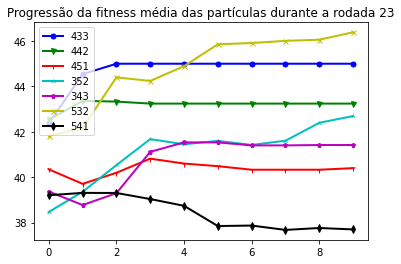

Resultados da rodada 23
Pontuação Máxima: 50.88 | Custo: 85.13 | Formação: 532
Pontuação real: 0
---------------------------------------------------------------------------


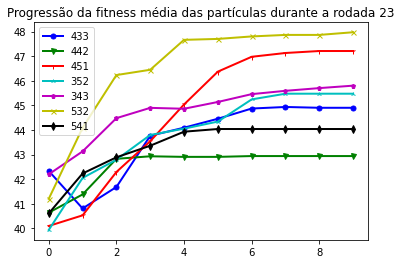

Resultados da rodada 23
Pontuação Máxima: 53.31 | Custo: 89.45 | Formação: 532
Pontuação real: 0
---------------------------------------------------------------------------


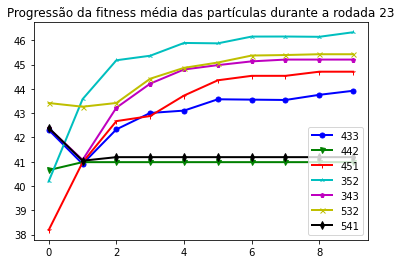

Resultados da rodada 23
Pontuação Máxima: 51.35 | Custo: 89.81 | Formação: 352
Pontuação real: 0
---------------------------------------------------------------------------


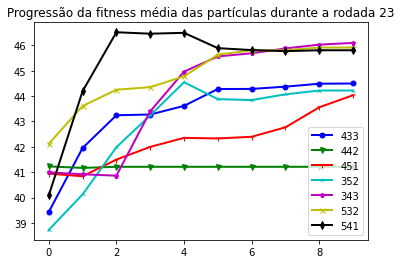

Resultados da rodada 23
Pontuação Máxima: 50.82 | Custo: 86.31 | Formação: 451
Pontuação real: 0
---------------------------------------------------------------------------


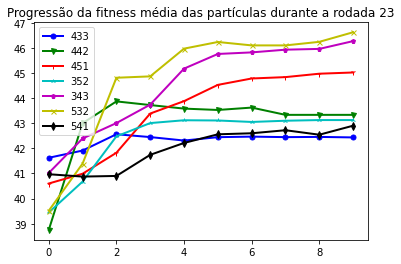

Resultados da rodada 23
Pontuação Máxima: 54.41 | Custo: 88.69 | Formação: 532
Pontuação real: 0
---------------------------------------------------------------------------


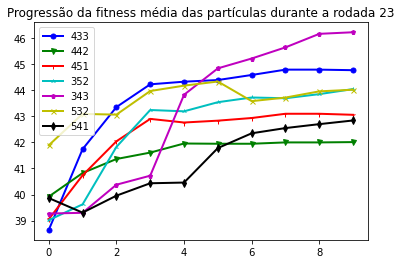

Resultados da rodada 23
Pontuação Máxima: 52.21 | Custo: 89.48 | Formação: 343
Pontuação real: 0
---------------------------------------------------------------------------


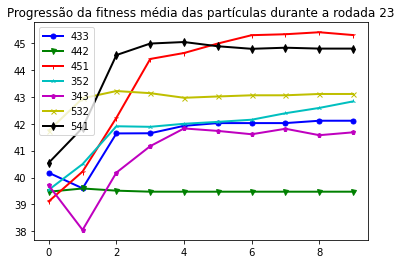

Resultados da rodada 23
Pontuação Máxima: 53.04 | Custo: 89.12 | Formação: 541
Pontuação real: 0
---------------------------------------------------------------------------


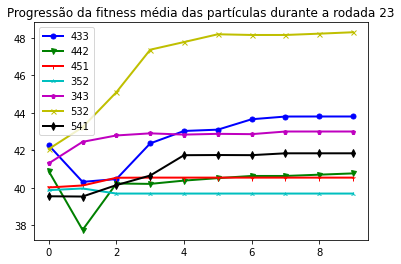

Resultados da rodada 23
Pontuação Máxima: 54.5 | Custo: 89.87 | Formação: 532
Pontuação real: 0
---------------------------------------------------------------------------


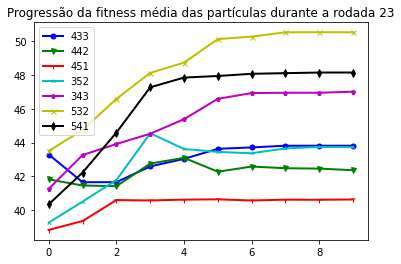

Resultados da rodada 23
Pontuação Máxima: 54.78 | Custo: 87.34 | Formação: 541
Pontuação real: 0
---------------------------------------------------------------------------
Média da pontuação: 52.863 | Desvio padrão da pontuação: 1.41
Média do custo: 87.91900000000001 | Desvio padrão do custo: 2.01


In [29]:
pts = []
custo = []
for i in range(10):
    num_cartoletas, rodadas, max_iteracoes, num_particulas, c1, c2 = 90, [23], 10, 30, 2.05, 4
    pso = PSO()
    pts.append(pso[0].fit)
    custo.append(pso[0].preco)
print('Média da pontuação:',sum(pts)/len(pts),'| Desvio padrão da pontuação:',round(np.std(pts),2))
print('Média do custo:',sum(custo)/len(custo),'| Desvio padrão do custo:',round(np.std(custo),2))

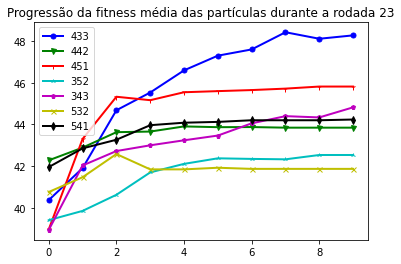

Resultados da rodada 23
Pontuação Máxima: 53.0 | Custo: 83.9 | Formação: 433
Pontuação real: 0
---------------------------------------------------------------------------


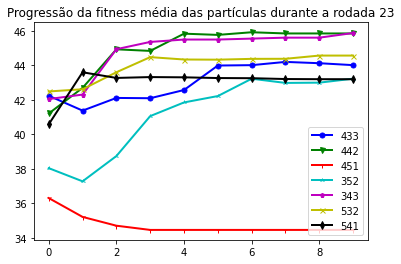

Resultados da rodada 23
Pontuação Máxima: 51.34 | Custo: 88.17 | Formação: 442
Pontuação real: 0
---------------------------------------------------------------------------


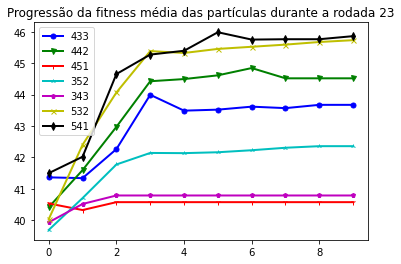

Resultados da rodada 23
Pontuação Máxima: 51.9 | Custo: 88.33 | Formação: 532
Pontuação real: 0
---------------------------------------------------------------------------


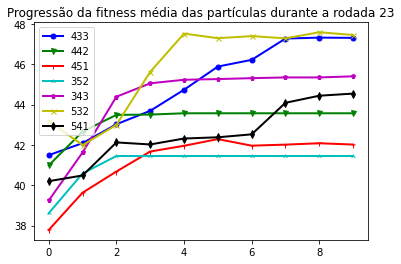

Resultados da rodada 23
Pontuação Máxima: 52.16 | Custo: 85.91 | Formação: 532
Pontuação real: 0
---------------------------------------------------------------------------


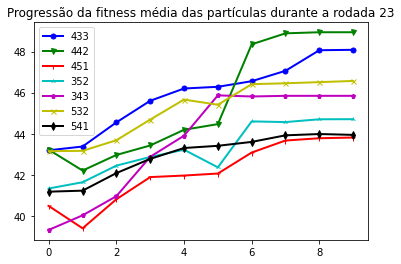

Resultados da rodada 23
Pontuação Máxima: 55.24 | Custo: 87.04 | Formação: 433
Pontuação real: 0
---------------------------------------------------------------------------


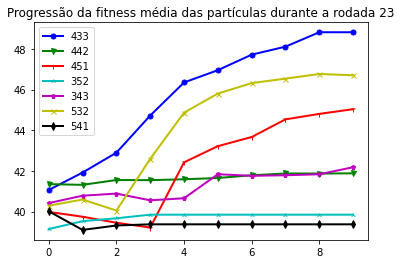

Resultados da rodada 23
Pontuação Máxima: 54.17 | Custo: 89.5 | Formação: 433
Pontuação real: 0
---------------------------------------------------------------------------


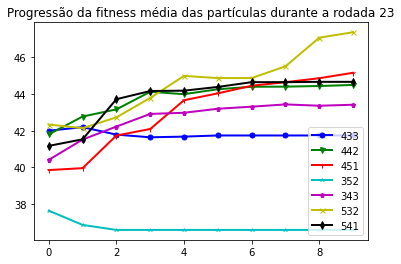

Resultados da rodada 23
Pontuação Máxima: 50.72 | Custo: 89.21 | Formação: 532
Pontuação real: 0
---------------------------------------------------------------------------


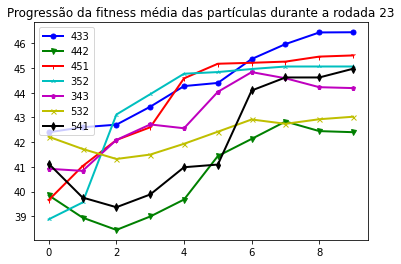

Resultados da rodada 23
Pontuação Máxima: 51.61 | Custo: 89.15 | Formação: 433
Pontuação real: 0
---------------------------------------------------------------------------


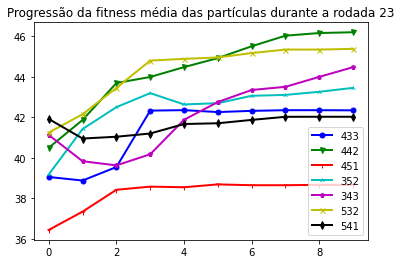

Resultados da rodada 23
Pontuação Máxima: 52.25 | Custo: 87.85 | Formação: 352
Pontuação real: 0
---------------------------------------------------------------------------


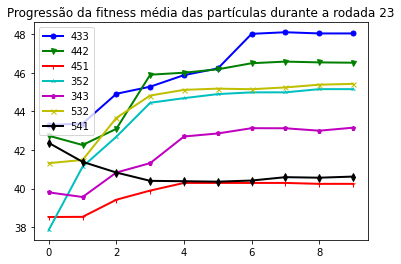

Resultados da rodada 23
Pontuação Máxima: 52.95 | Custo: 89.2 | Formação: 433
Pontuação real: 0
---------------------------------------------------------------------------
Média da pontuação: 52.534000000000006 | Desvio padrão da pontuação: 1.29
Média do custo: 87.826 | Desvio padrão do custo: 1.69


In [30]:
pts = []
custo = []
for i in range(10):
    num_cartoletas, rodadas, max_iteracoes, num_particulas, c1, c2 = 90, [23], 10, 30, 4, 2.05
    pso = PSO()
    pts.append(pso[0].fit)
    custo.append(pso[0].preco)
print('Média da pontuação:',sum(pts)/len(pts),'| Desvio padrão da pontuação:',round(np.std(pts),2))
print('Média do custo:',sum(custo)/len(custo),'| Desvio padrão do custo:',round(np.std(custo),2))

### Experimento 3 - avaliando a influência do máximo de iterações

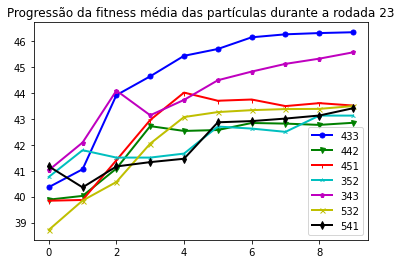

Resultados da rodada 23
Pontuação Máxima: 52.61 | Custo: 89.41 | Formação: 433
Pontuação real: 0
---------------------------------------------------------------------------


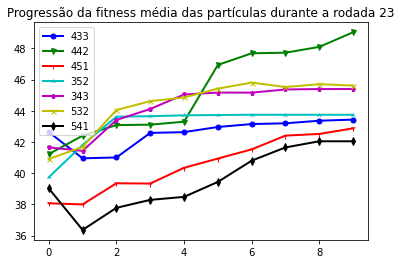

Resultados da rodada 23
Pontuação Máxima: 53.9 | Custo: 85.67 | Formação: 442
Pontuação real: 0
---------------------------------------------------------------------------


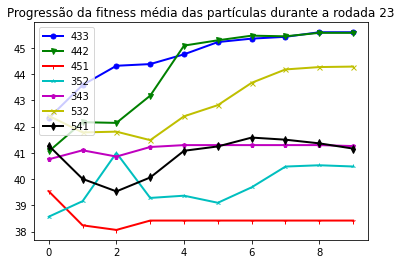

Resultados da rodada 23
Pontuação Máxima: 52.26 | Custo: 89.81 | Formação: 433
Pontuação real: 0
---------------------------------------------------------------------------


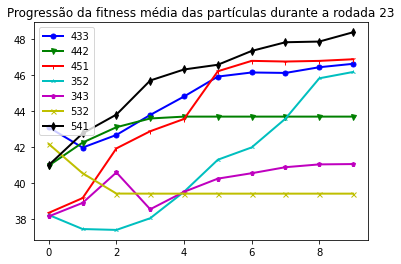

Resultados da rodada 23
Pontuação Máxima: 54.63 | Custo: 88.68 | Formação: 541
Pontuação real: 0
---------------------------------------------------------------------------


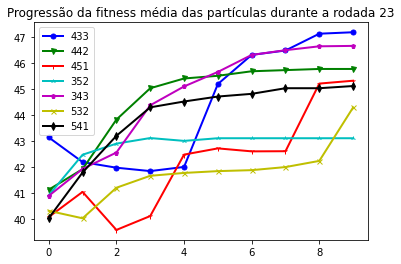

Resultados da rodada 23
Pontuação Máxima: 51.93 | Custo: 89.49 | Formação: 343
Pontuação real: 0
---------------------------------------------------------------------------


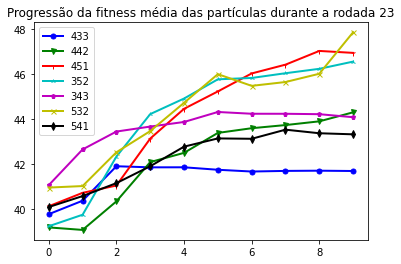

Resultados da rodada 23
Pontuação Máxima: 52.83 | Custo: 89.92 | Formação: 532
Pontuação real: 0
---------------------------------------------------------------------------


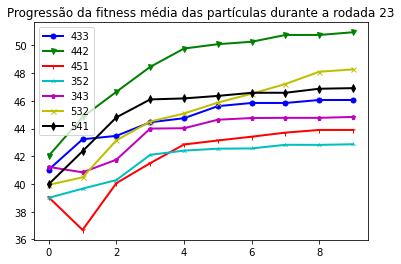

Resultados da rodada 23
Pontuação Máxima: 53.67 | Custo: 88.32 | Formação: 541
Pontuação real: 0
---------------------------------------------------------------------------


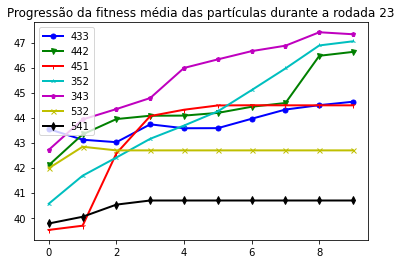

Resultados da rodada 23
Pontuação Máxima: 52.87 | Custo: 88.66 | Formação: 442
Pontuação real: 0
---------------------------------------------------------------------------


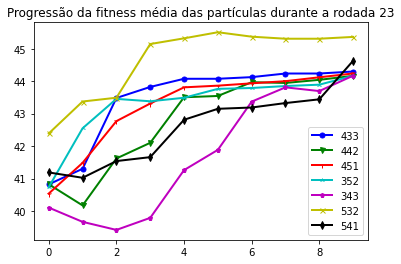

Resultados da rodada 23
Pontuação Máxima: 52.13 | Custo: 89.02 | Formação: 532
Pontuação real: 0
---------------------------------------------------------------------------


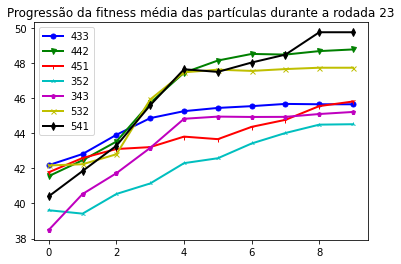

Resultados da rodada 23
Pontuação Máxima: 55.32 | Custo: 88.87 | Formação: 442
Pontuação real: 0
---------------------------------------------------------------------------
Média da pontuação: 53.214999999999996 | Desvio padrão da pontuação: 1.07
Média do custo: 88.785 | Desvio padrão do custo: 1.15


In [31]:
pts = []
custo = []
for i in range(10):
    num_cartoletas, rodadas, max_iteracoes, num_particulas, c1, c2 = 90, [23], 10, 30, 4, 2.05
    pso = PSO()
    pts.append(pso[0].fit)
    custo.append(pso[0].preco)
print('Média da pontuação:',sum(pts)/len(pts),'| Desvio padrão da pontuação:',round(np.std(pts),2))
print('Média do custo:',sum(custo)/len(custo),'| Desvio padrão do custo:',round(np.std(custo),2))

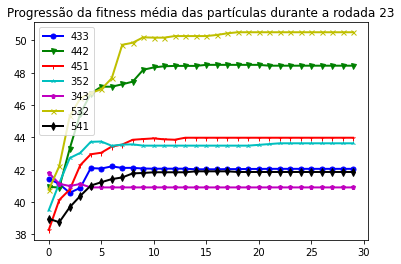

Resultados da rodada 23
Pontuação Máxima: 54.28 | Custo: 84.69 | Formação: 442
Pontuação real: 0
---------------------------------------------------------------------------


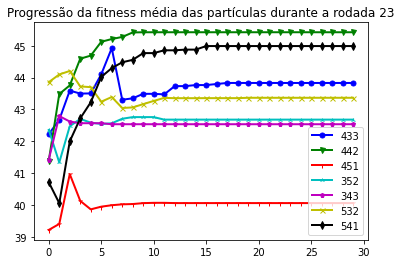

Resultados da rodada 23
Pontuação Máxima: 50.66 | Custo: 89.11 | Formação: 433
Pontuação real: 0
---------------------------------------------------------------------------


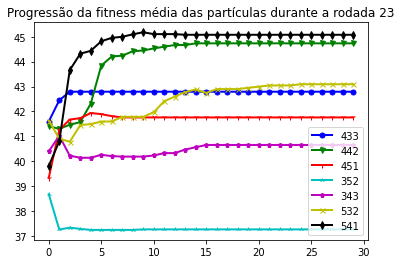

Resultados da rodada 23
Pontuação Máxima: 50.86 | Custo: 89.27 | Formação: 433
Pontuação real: 0
---------------------------------------------------------------------------


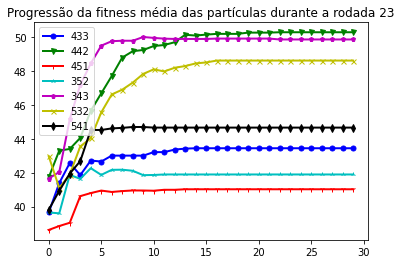

Resultados da rodada 23
Pontuação Máxima: 54.53 | Custo: 89.74 | Formação: 343
Pontuação real: 0
---------------------------------------------------------------------------


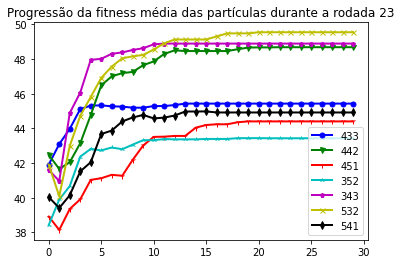

Resultados da rodada 23
Pontuação Máxima: 54.67 | Custo: 88.97 | Formação: 343
Pontuação real: 0
---------------------------------------------------------------------------


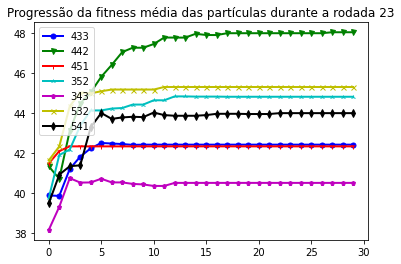

Resultados da rodada 23
Pontuação Máxima: 52.37 | Custo: 85.51 | Formação: 442
Pontuação real: 0
---------------------------------------------------------------------------


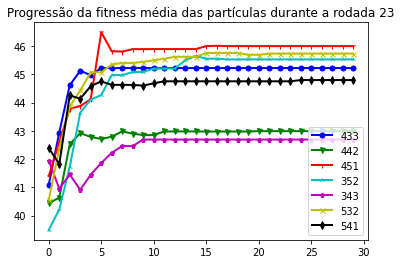

Resultados da rodada 23
Pontuação Máxima: 50.52 | Custo: 89.58 | Formação: 433
Pontuação real: 0
---------------------------------------------------------------------------


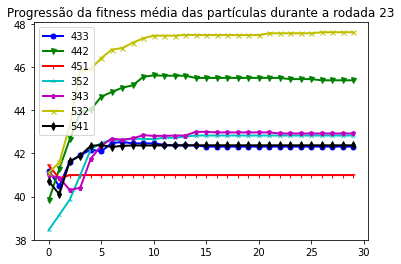

Resultados da rodada 23
Pontuação Máxima: 52.58 | Custo: 89.84 | Formação: 442
Pontuação real: 0
---------------------------------------------------------------------------


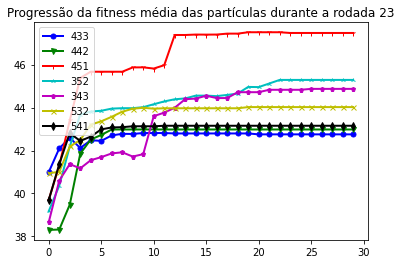

Resultados da rodada 23
Pontuação Máxima: 52.07 | Custo: 86.21 | Formação: 451
Pontuação real: 0
---------------------------------------------------------------------------


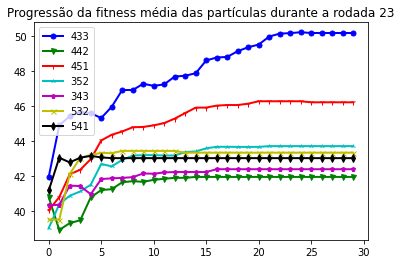

Resultados da rodada 23
Pontuação Máxima: 53.23 | Custo: 87.37 | Formação: 433
Pontuação real: 0
---------------------------------------------------------------------------
Média da pontuação: 52.577 | Desvio padrão da pontuação: 1.51
Média do custo: 88.02900000000002 | Desvio padrão do custo: 1.83


In [32]:
pts = []
custo = []
for i in range(10):
    num_cartoletas, rodadas, max_iteracoes, num_particulas, c1, c2 = 90, [23], 30, 30, 4, 2.05
    pso = PSO()
    pts.append(pso[0].fit)
    custo.append(pso[0].preco)
print('Média da pontuação:',sum(pts)/len(pts),'| Desvio padrão da pontuação:',round(np.std(pts),2))
print('Média do custo:',sum(custo)/len(custo),'| Desvio padrão do custo:',round(np.std(custo),2))

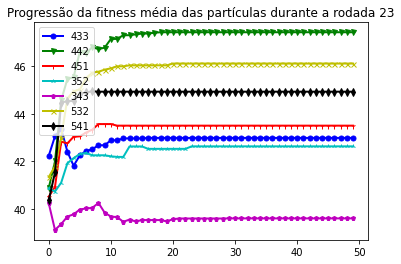

Resultados da rodada 23
Pontuação Máxima: 52.27 | Custo: 88.62 | Formação: 442
Pontuação real: 0
---------------------------------------------------------------------------


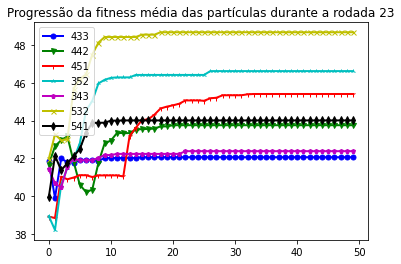

Resultados da rodada 23
Pontuação Máxima: 53.0 | Custo: 82.56 | Formação: 532
Pontuação real: 0
---------------------------------------------------------------------------


KeyboardInterrupt: 

In [33]:
pts = []
custo = []
for i in range(10):
    num_cartoletas, rodadas, max_iteracoes, num_particulas, c1, c2 = 90, [23], 50, 30, 4, 2.05
    pso = PSO()
    pts.append(pso[0].fit)
    custo.append(pso[0].preco)
print('Média da pontuação:',sum(pts)/len(pts),'| Desvio padrão da pontuação:',round(np.std(pts),2))
print('Média do custo:',sum(custo)/len(custo),'| Desvio padrão do custo:',round(np.std(custo),2))

### Após definição dos melhores parâmetros

#### Rodada 11

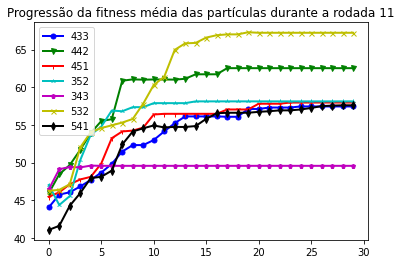

Resultados da rodada 11
Pontuação Máxima: 74.05 | Custo: 88.39 | Formação: 532
---------------------------------------------------------------------------


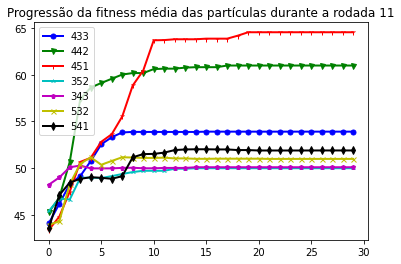

Resultados da rodada 11
Pontuação Máxima: 72.98 | Custo: 88.99 | Formação: 442
---------------------------------------------------------------------------


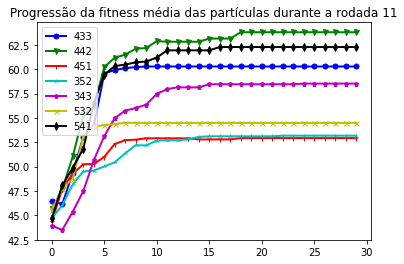

Resultados da rodada 11
Pontuação Máxima: 74.58 | Custo: 88.8 | Formação: 442
---------------------------------------------------------------------------


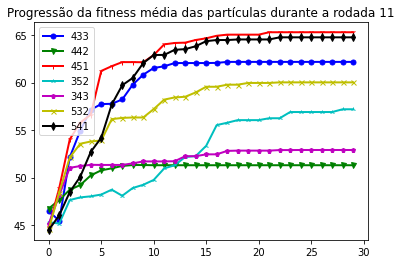

Resultados da rodada 11
Pontuação Máxima: 72.22 | Custo: 89.1 | Formação: 451
---------------------------------------------------------------------------


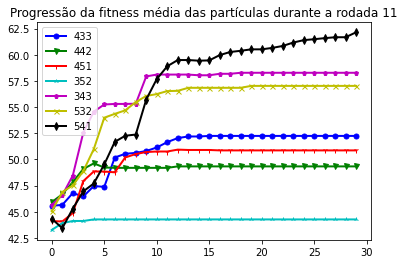

Resultados da rodada 11
Pontuação Máxima: 68.24 | Custo: 86.78 | Formação: 541
---------------------------------------------------------------------------


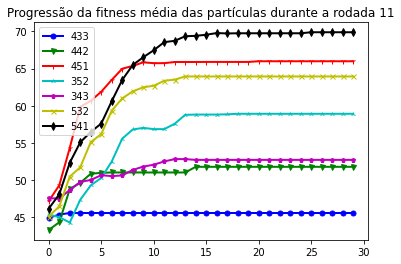

Resultados da rodada 11
Pontuação Máxima: 76.53 | Custo: 85.65 | Formação: 541
---------------------------------------------------------------------------


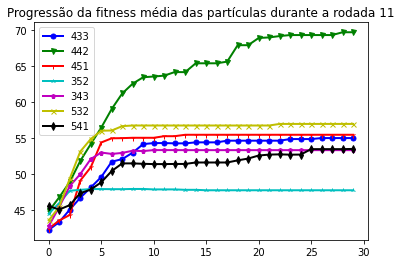

Resultados da rodada 11
Pontuação Máxima: 73.65 | Custo: 89.16 | Formação: 442
---------------------------------------------------------------------------


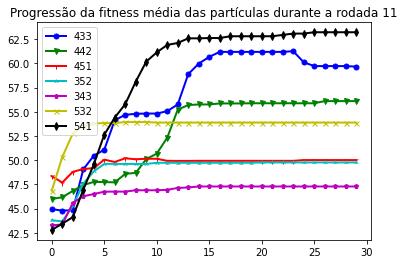

Resultados da rodada 11
Pontuação Máxima: 65.8 | Custo: 88.25 | Formação: 532
---------------------------------------------------------------------------


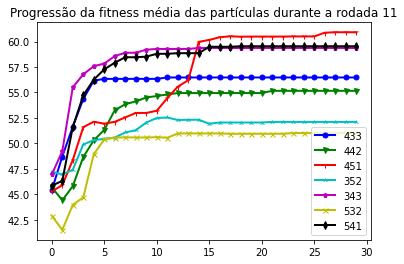

Resultados da rodada 11
Pontuação Máxima: 69.15 | Custo: 84.86 | Formação: 451
---------------------------------------------------------------------------


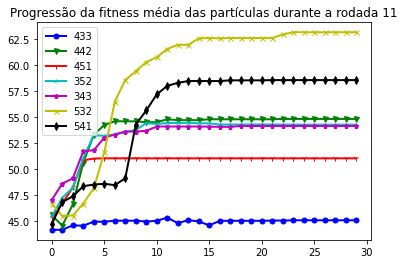

Resultados da rodada 11
Pontuação Máxima: 64.57 | Custo: 88.45 | Formação: 532
---------------------------------------------------------------------------
Média da pontuação: 71.17699999999999 | Desvio padrão da pontuação: 3.8
Média da pontuação real: 73.501 | Desvio padrão da pontuação real: 11.71
Média do custo: 87.843 | Desvio padrão do custo: 1.46


In [38]:
pts = []
r_pts = []
custo = []
for i in range(10):
    num_cartoletas, rodadas, max_iteracoes, num_particulas, c1, c2 = 90, [11], 30, 30, 4, 2.05
    pso = PSO()
    pts.append(pso[0].fit)
    r_pts.append(pso[0].real_fit)
    custo.append(pso[0].preco)
print('Média da pontuação:',sum(pts)/len(pts),'| Desvio padrão da pontuação:',round(np.std(pts),2))
print('Média da pontuação real:',sum(r_pts)/len(r_pts),'| Desvio padrão da pontuação real:',round(np.std(r_pts),2))
print('Média do custo:',sum(custo)/len(custo),'| Desvio padrão do custo:',round(np.std(custo),2))

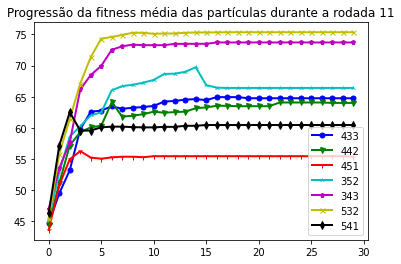

Resultados da rodada 11
Pontuação Máxima: 86.25 | Custo: 145.66 | Formação: 343
---------------------------------------------------------------------------


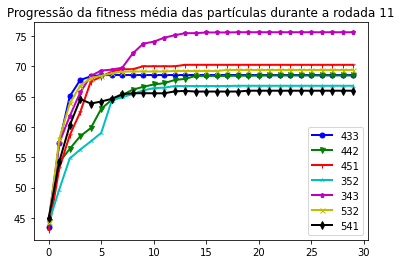

Resultados da rodada 11
Pontuação Máxima: 81.92 | Custo: 149.56 | Formação: 343
---------------------------------------------------------------------------


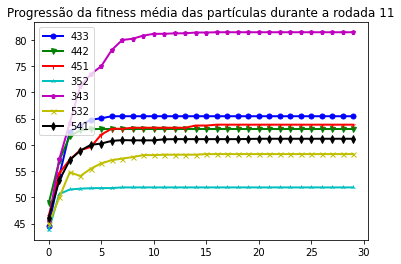

Resultados da rodada 11
Pontuação Máxima: 85.78 | Custo: 122.18 | Formação: 343
---------------------------------------------------------------------------


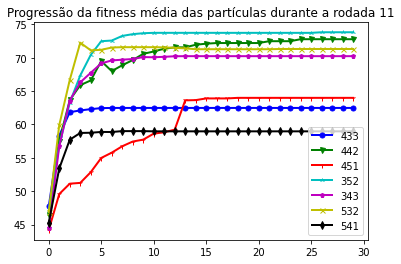

Resultados da rodada 11
Pontuação Máxima: 81.94 | Custo: 151.18 | Formação: 442
---------------------------------------------------------------------------


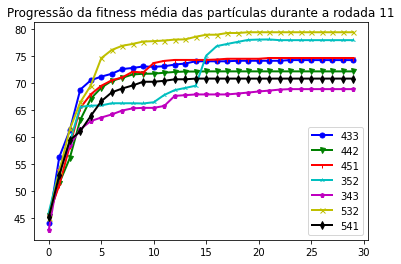

Resultados da rodada 11
Pontuação Máxima: 87.9 | Custo: 123.83 | Formação: 433
---------------------------------------------------------------------------


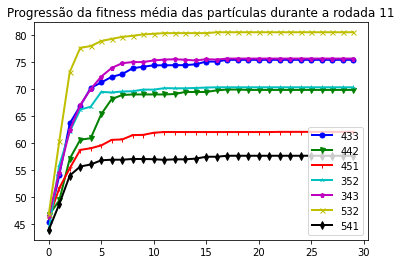

Resultados da rodada 11
Pontuação Máxima: 91.81 | Custo: 146.55 | Formação: 532
---------------------------------------------------------------------------


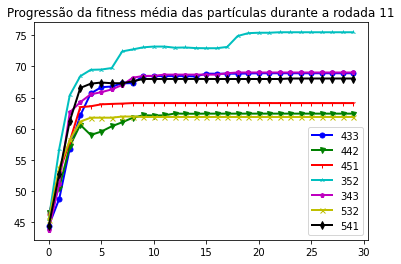

Resultados da rodada 11
Pontuação Máxima: 83.39 | Custo: 152.82 | Formação: 352
---------------------------------------------------------------------------


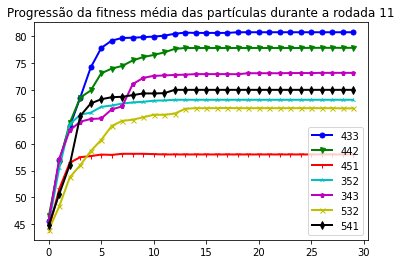

Resultados da rodada 11
Pontuação Máxima: 86.55 | Custo: 140.4 | Formação: 433
---------------------------------------------------------------------------


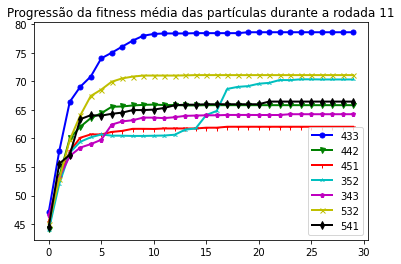

Resultados da rodada 11
Pontuação Máxima: 84.06 | Custo: 128.22 | Formação: 433
---------------------------------------------------------------------------


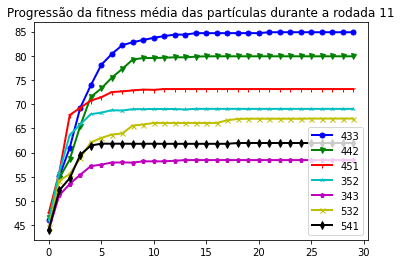

Resultados da rodada 11
Pontuação Máxima: 89.04 | Custo: 135.55 | Formação: 433
---------------------------------------------------------------------------
Média da pontuação: 85.86399999999999 | Desvio padrão da pontuação: 3.01
Média da pontuação real: 78.06500000000001 | Desvio padrão da pontuação real: 12.77
Média do custo: 139.59499999999997 | Desvio padrão do custo: 10.92


In [39]:
pts = []
r_pts = []
custo = []
for i in range(10):
    num_cartoletas, rodadas, max_iteracoes, num_particulas, c1, c2 = 180, [11], 30, 30, 4, 2.05
    pso = PSO()
    pts.append(pso[0].fit)
    r_pts.append(pso[0].real_fit)
    custo.append(pso[0].preco)
print('Média da pontuação:',sum(pts)/len(pts),'| Desvio padrão da pontuação:',round(np.std(pts),2))
print('Média da pontuação real:',sum(r_pts)/len(r_pts),'| Desvio padrão da pontuação real:',round(np.std(r_pts),2))
print('Média do custo:',sum(custo)/len(custo),'| Desvio padrão do custo:',round(np.std(custo),2))

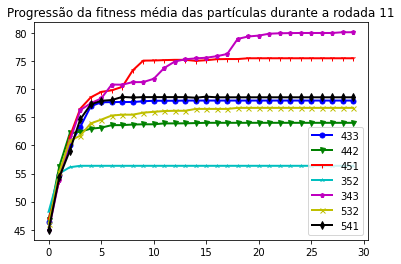

Resultados da rodada 11
Pontuação Máxima: 85.61 | Custo: 127.36 | Formação: 343
---------------------------------------------------------------------------


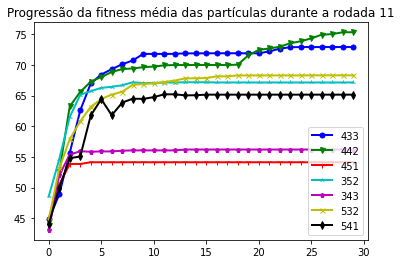

Resultados da rodada 11
Pontuação Máxima: 83.17 | Custo: 134.03 | Formação: 442
---------------------------------------------------------------------------


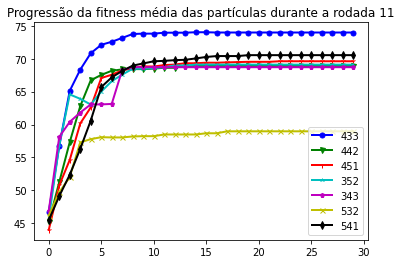

Resultados da rodada 11
Pontuação Máxima: 87.13 | Custo: 165.98 | Formação: 433
---------------------------------------------------------------------------


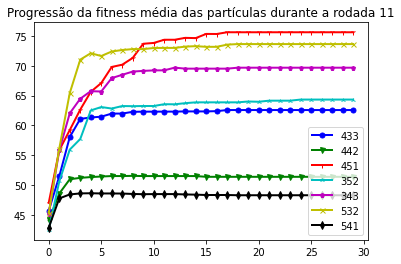

Resultados da rodada 11
Pontuação Máxima: 84.29 | Custo: 128.3 | Formação: 451
---------------------------------------------------------------------------


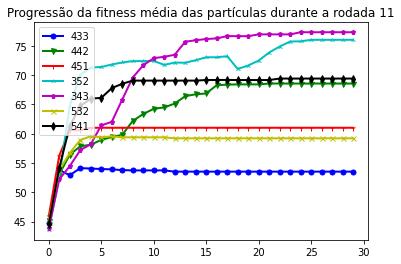

Resultados da rodada 11
Pontuação Máxima: 83.08 | Custo: 148.58 | Formação: 343
---------------------------------------------------------------------------


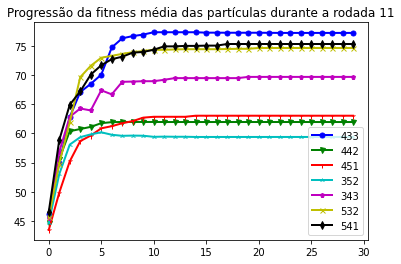

Resultados da rodada 11
Pontuação Máxima: 83.21 | Custo: 131.06 | Formação: 541
---------------------------------------------------------------------------


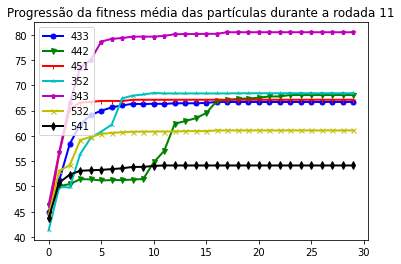

Resultados da rodada 11
Pontuação Máxima: 88.53 | Custo: 137.31 | Formação: 343
---------------------------------------------------------------------------


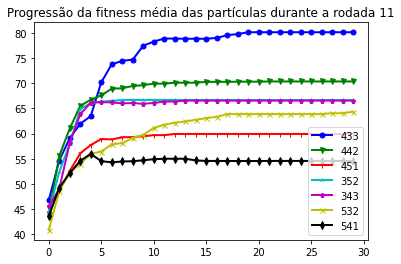

Resultados da rodada 11
Pontuação Máxima: 86.46 | Custo: 145.76 | Formação: 433
---------------------------------------------------------------------------


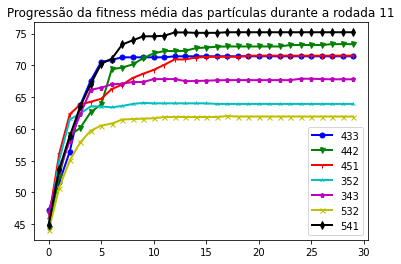

Resultados da rodada 11
Pontuação Máxima: 79.37 | Custo: 153.5 | Formação: 343
---------------------------------------------------------------------------


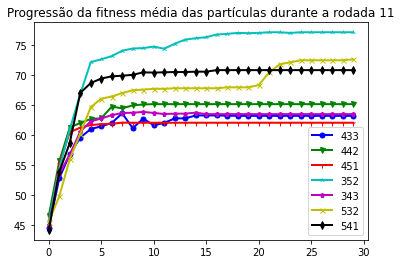

Resultados da rodada 11
Pontuação Máxima: 82.61 | Custo: 139.74 | Formação: 352
---------------------------------------------------------------------------
Média da pontuação: 84.34600000000002 | Desvio padrão da pontuação: 2.52
Média da pontuação real: 72.588 | Desvio padrão da pontuação real: 13.15
Média do custo: 141.16199999999998 | Desvio padrão do custo: 11.7


In [40]:
pts = []
r_pts = []
custo = []
for i in range(10):
    num_cartoletas, rodadas, max_iteracoes, num_particulas, c1, c2 = 270, [11], 30, 30, 4, 2.05
    pso = PSO()
    pts.append(pso[0].fit)
    r_pts.append(pso[0].real_fit)
    custo.append(pso[0].preco)
print('Média da pontuação:',sum(pts)/len(pts),'| Desvio padrão da pontuação:',round(np.std(pts),2))
print('Média da pontuação real:',sum(r_pts)/len(r_pts),'| Desvio padrão da pontuação real:',round(np.std(r_pts),2))
print('Média do custo:',sum(custo)/len(custo),'| Desvio padrão do custo:',round(np.std(custo),2))

#### Rodada 23

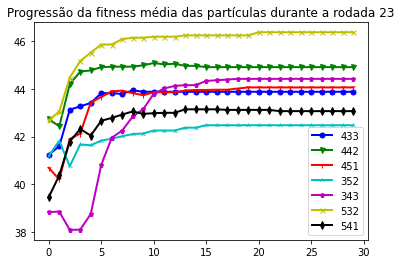

Resultados da rodada 23
Pontuação Máxima: 51.46 | Custo: 89.1 | Formação: 541
---------------------------------------------------------------------------


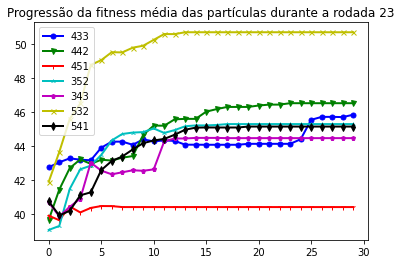

Resultados da rodada 23
Pontuação Máxima: 55.79 | Custo: 88.72 | Formação: 532
---------------------------------------------------------------------------


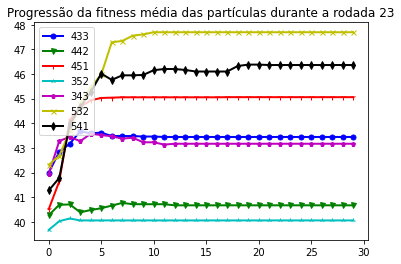

Resultados da rodada 23
Pontuação Máxima: 52.99 | Custo: 88.13 | Formação: 532
---------------------------------------------------------------------------


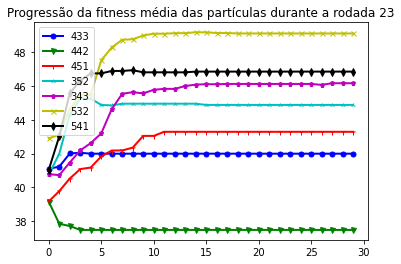

Resultados da rodada 23
Pontuação Máxima: 53.33 | Custo: 88.42 | Formação: 532
---------------------------------------------------------------------------


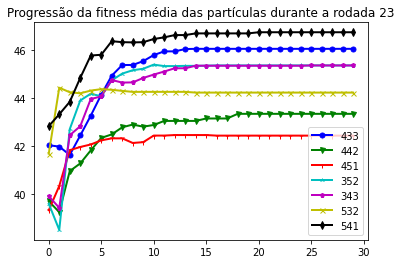

Resultados da rodada 23
Pontuação Máxima: 54.73 | Custo: 88.09 | Formação: 541
---------------------------------------------------------------------------


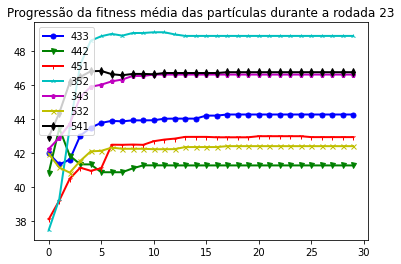

Resultados da rodada 23
Pontuação Máxima: 55.34 | Custo: 84.52 | Formação: 352
---------------------------------------------------------------------------


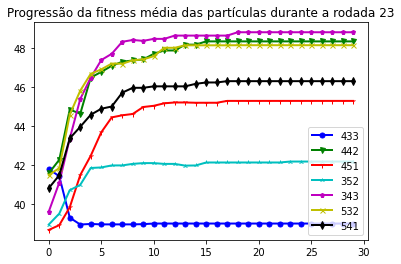

Resultados da rodada 23
Pontuação Máxima: 53.54 | Custo: 88.76 | Formação: 541
---------------------------------------------------------------------------


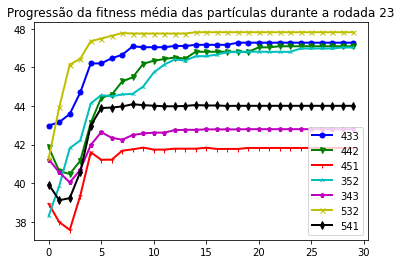

Resultados da rodada 23
Pontuação Máxima: 52.47 | Custo: 88.26 | Formação: 532
---------------------------------------------------------------------------


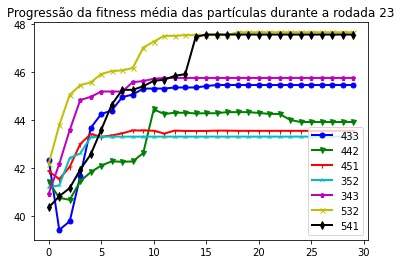

Resultados da rodada 23
Pontuação Máxima: 52.55 | Custo: 82.2 | Formação: 541
---------------------------------------------------------------------------


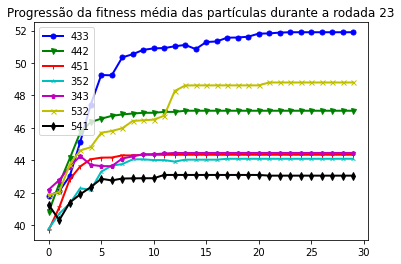

Resultados da rodada 23
Pontuação Máxima: 54.86 | Custo: 89.41 | Formação: 433
---------------------------------------------------------------------------
Média da pontuação: 53.705999999999996 | Desvio padrão da pontuação: 1.34
Média da pontuação real: 42.678000000000004 | Desvio padrão da pontuação real: 8.07
Média do custo: 87.561 | Desvio padrão do custo: 2.2


In [41]:
pts = []
r_pts = []
custo = []
for i in range(10):
    num_cartoletas, rodadas, max_iteracoes, num_particulas, c1, c2 = 90, [23], 30, 30, 4, 2.05
    pso = PSO()
    pts.append(pso[0].fit)
    r_pts.append(pso[0].real_fit)
    custo.append(pso[0].preco)
print('Média da pontuação:',sum(pts)/len(pts),'| Desvio padrão da pontuação:',round(np.std(pts),2))
print('Média da pontuação real:',sum(r_pts)/len(r_pts),'| Desvio padrão da pontuação real:',round(np.std(r_pts),2))
print('Média do custo:',sum(custo)/len(custo),'| Desvio padrão do custo:',round(np.std(custo),2))

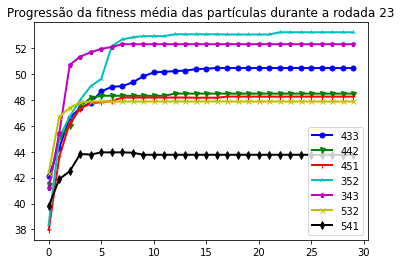

Resultados da rodada 23
Pontuação Máxima: 60.66 | Custo: 132.01 | Formação: 343
---------------------------------------------------------------------------


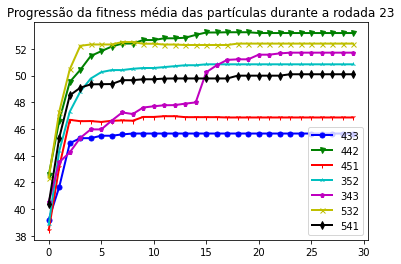

Resultados da rodada 23
Pontuação Máxima: 61.48 | Custo: 120.63 | Formação: 532
---------------------------------------------------------------------------


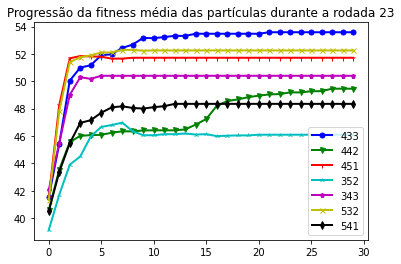

Resultados da rodada 23
Pontuação Máxima: 59.81 | Custo: 111.51 | Formação: 343
---------------------------------------------------------------------------


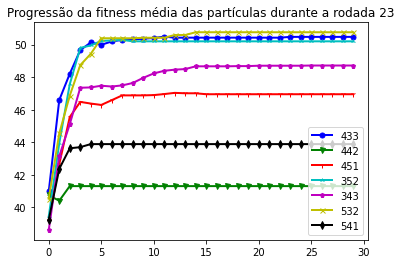

Resultados da rodada 23
Pontuação Máxima: 60.25 | Custo: 124.63 | Formação: 532
---------------------------------------------------------------------------


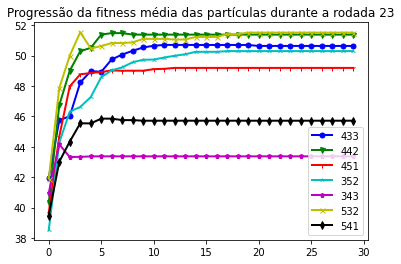

Resultados da rodada 23
Pontuação Máxima: 61.22 | Custo: 112.66 | Formação: 532
---------------------------------------------------------------------------


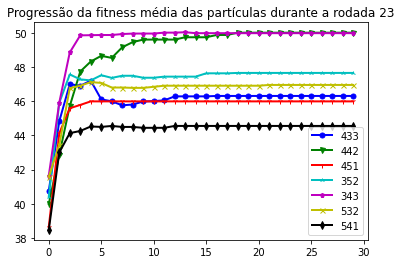

Resultados da rodada 23
Pontuação Máxima: 60.96 | Custo: 143.02 | Formação: 442
---------------------------------------------------------------------------


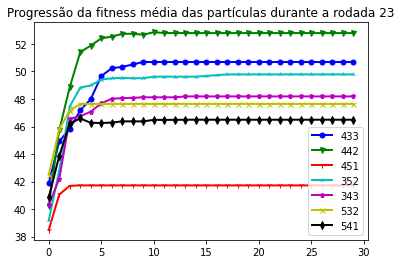

Resultados da rodada 23
Pontuação Máxima: 58.52 | Custo: 143.55 | Formação: 352
---------------------------------------------------------------------------


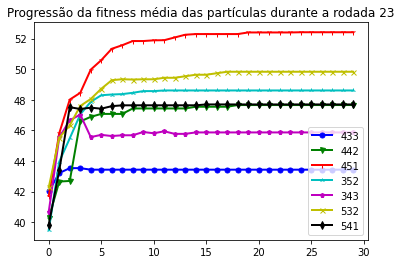

Resultados da rodada 23
Pontuação Máxima: 59.95 | Custo: 121.14 | Formação: 451
---------------------------------------------------------------------------


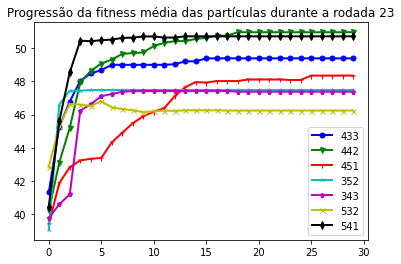

Resultados da rodada 23
Pontuação Máxima: 58.3 | Custo: 112.57 | Formação: 442
---------------------------------------------------------------------------


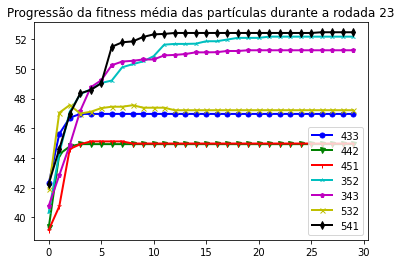

Resultados da rodada 23
Pontuação Máxima: 60.46 | Custo: 112.42 | Formação: 352
---------------------------------------------------------------------------
Média da pontuação: 60.16099999999999 | Desvio padrão da pontuação: 1.01
Média da pontuação real: 50.208999999999996 | Desvio padrão da pontuação real: 9.06
Média do custo: 123.41400000000002 | Desvio padrão do custo: 11.72


In [42]:
pts = []
r_pts = []
custo = []
for i in range(10):
    num_cartoletas, rodadas, max_iteracoes, num_particulas, c1, c2 = 180, [23], 30, 30, 4, 2.05
    pso = PSO()
    pts.append(pso[0].fit)
    r_pts.append(pso[0].real_fit)
    custo.append(pso[0].preco)
print('Média da pontuação:',sum(pts)/len(pts),'| Desvio padrão da pontuação:',round(np.std(pts),2))
print('Média da pontuação real:',sum(r_pts)/len(r_pts),'| Desvio padrão da pontuação real:',round(np.std(r_pts),2))
print('Média do custo:',sum(custo)/len(custo),'| Desvio padrão do custo:',round(np.std(custo),2))

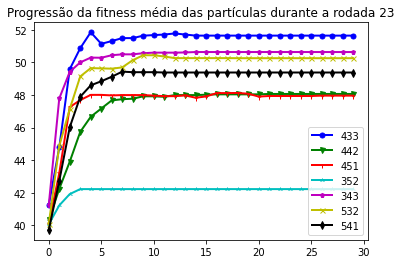

Resultados da rodada 23
Pontuação Máxima: 59.11 | Custo: 119.03 | Formação: 532
---------------------------------------------------------------------------


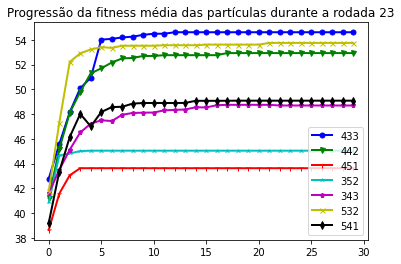

Resultados da rodada 23
Pontuação Máxima: 64.31 | Custo: 128.91 | Formação: 433
---------------------------------------------------------------------------


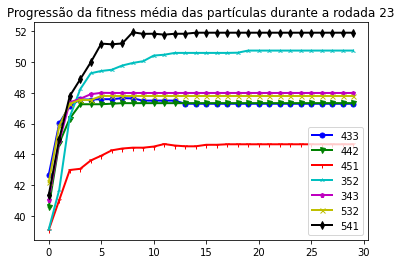

Resultados da rodada 23
Pontuação Máxima: 58.69 | Custo: 113.64 | Formação: 541
---------------------------------------------------------------------------


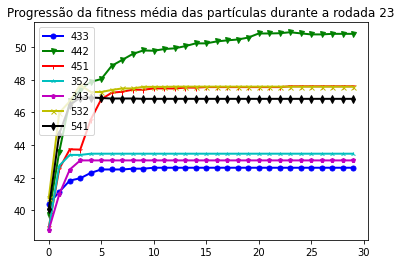

Resultados da rodada 23
Pontuação Máxima: 59.06 | Custo: 128.25 | Formação: 451
---------------------------------------------------------------------------


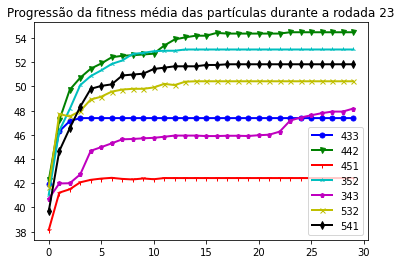

Resultados da rodada 23
Pontuação Máxima: 61.17 | Custo: 131.2 | Formação: 442
---------------------------------------------------------------------------


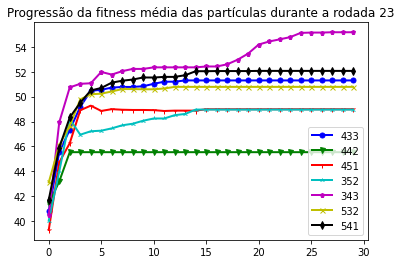

Resultados da rodada 23
Pontuação Máxima: 61.36 | Custo: 118.86 | Formação: 433
---------------------------------------------------------------------------


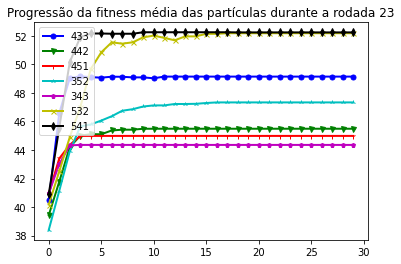

Resultados da rodada 23
Pontuação Máxima: 65.14 | Custo: 121.43 | Formação: 532
---------------------------------------------------------------------------


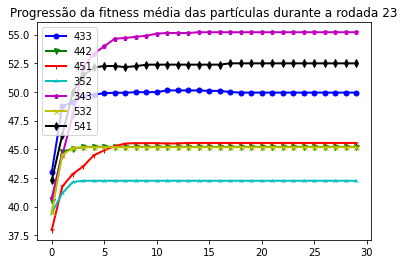

Resultados da rodada 23
Pontuação Máxima: 60.84 | Custo: 133.81 | Formação: 343
---------------------------------------------------------------------------


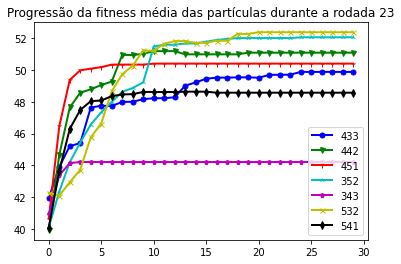

Resultados da rodada 23
Pontuação Máxima: 61.81 | Custo: 145.63 | Formação: 451
---------------------------------------------------------------------------


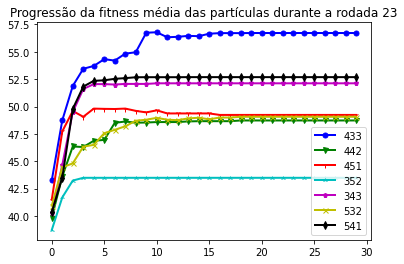

Resultados da rodada 23
Pontuação Máxima: 64.99 | Custo: 134.35 | Formação: 433
---------------------------------------------------------------------------
Média da pontuação: 61.648 | Desvio padrão da pontuação: 2.31
Média da pontuação real: 40.617000000000004 | Desvio padrão da pontuação real: 8.04
Média do custo: 127.51099999999997 | Desvio padrão do custo: 8.98


In [43]:
pts = []
r_pts = []
custo = []
for i in range(10):
    num_cartoletas, rodadas, max_iteracoes, num_particulas, c1, c2 = 270, [23], 30, 30, 4, 2.05
    pso = PSO()
    pts.append(pso[0].fit)
    r_pts.append(pso[0].real_fit)
    custo.append(pso[0].preco)
print('Média da pontuação:',sum(pts)/len(pts),'| Desvio padrão da pontuação:',round(np.std(pts),2))
print('Média da pontuação real:',sum(r_pts)/len(r_pts),'| Desvio padrão da pontuação real:',round(np.std(r_pts),2))
print('Média do custo:',sum(custo)/len(custo),'| Desvio padrão do custo:',round(np.std(custo),2))

#### Rodada 38

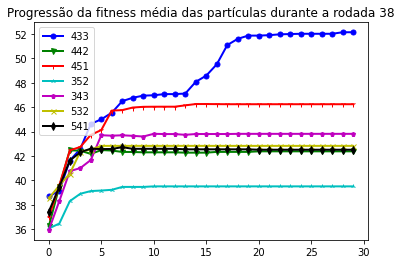

Resultados da rodada 38
Pontuação Máxima: 54.84 | Custo: 80.46 | Formação: 433
---------------------------------------------------------------------------


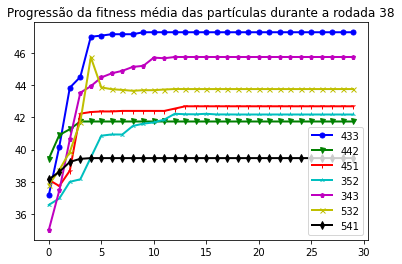

Resultados da rodada 38
Pontuação Máxima: 53.18 | Custo: 89.0 | Formação: 433
---------------------------------------------------------------------------


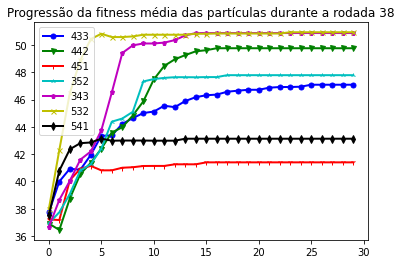

Resultados da rodada 38
Pontuação Máxima: 57.26 | Custo: 89.43 | Formação: 343
---------------------------------------------------------------------------


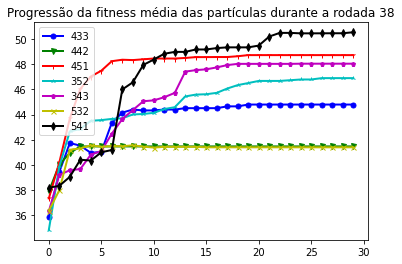

Resultados da rodada 38
Pontuação Máxima: 52.91 | Custo: 82.54 | Formação: 541
---------------------------------------------------------------------------


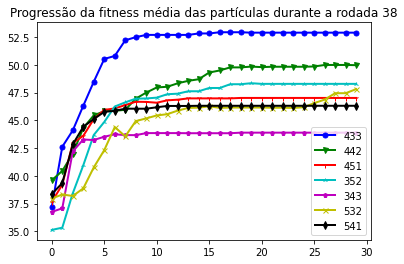

Resultados da rodada 38
Pontuação Máxima: 59.73 | Custo: 89.28 | Formação: 433
---------------------------------------------------------------------------


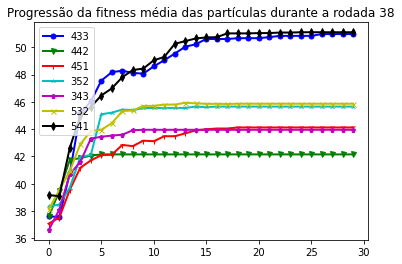

Resultados da rodada 38
Pontuação Máxima: 55.16 | Custo: 55.35 | Formação: 433
---------------------------------------------------------------------------


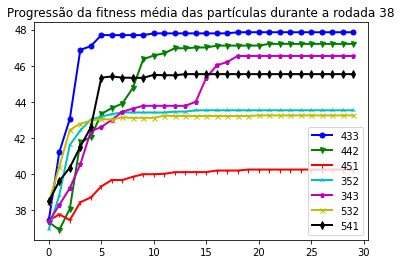

Resultados da rodada 38
Pontuação Máxima: 54.89 | Custo: 85.47 | Formação: 442
---------------------------------------------------------------------------


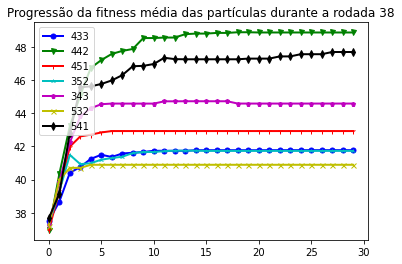

Resultados da rodada 38
Pontuação Máxima: 54.0 | Custo: 81.19 | Formação: 541
---------------------------------------------------------------------------


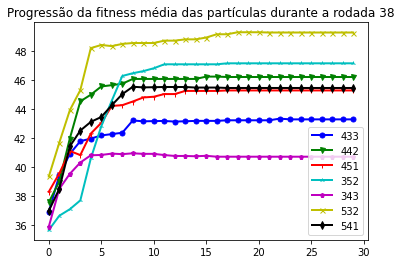

Resultados da rodada 38
Pontuação Máxima: 56.83 | Custo: 87.98 | Formação: 532
---------------------------------------------------------------------------


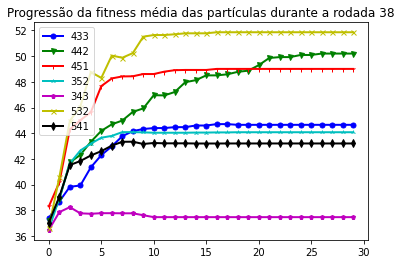

Resultados da rodada 38
Pontuação Máxima: 57.65 | Custo: 88.38 | Formação: 451
---------------------------------------------------------------------------
Média da pontuação: 55.645 | Desvio padrão da pontuação: 2.06
Média da pontuação real: 45.23 | Desvio padrão da pontuação real: 11.09
Média do custo: 82.908 | Desvio padrão do custo: 9.75


In [44]:
pts = []
r_pts = []
custo = []
for i in range(10):
    num_cartoletas, rodadas, max_iteracoes, num_particulas, c1, c2 = 90, [38], 30, 30, 4, 2.05
    pso = PSO()
    pts.append(pso[0].fit)
    r_pts.append(pso[0].real_fit)
    custo.append(pso[0].preco)
print('Média da pontuação:',sum(pts)/len(pts),'| Desvio padrão da pontuação:',round(np.std(pts),2))
print('Média da pontuação real:',sum(r_pts)/len(r_pts),'| Desvio padrão da pontuação real:',round(np.std(r_pts),2))
print('Média do custo:',sum(custo)/len(custo),'| Desvio padrão do custo:',round(np.std(custo),2))

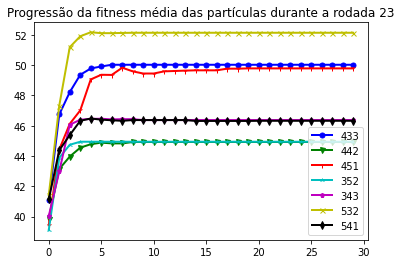

Resultados da rodada 23
Pontuação Máxima: 59.87 | Custo: 118.16 | Formação: 532
---------------------------------------------------------------------------


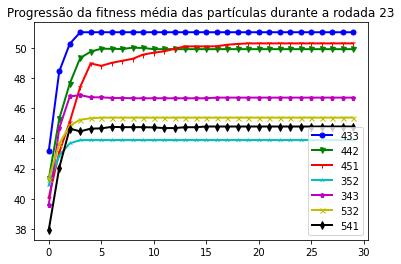

Resultados da rodada 23
Pontuação Máxima: 61.61 | Custo: 120.3 | Formação: 433
---------------------------------------------------------------------------


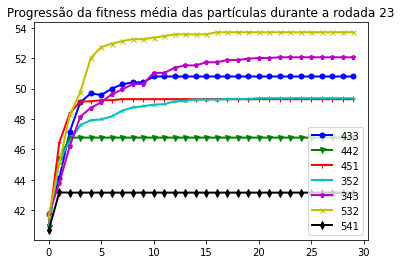

Resultados da rodada 23
Pontuação Máxima: 61.59 | Custo: 115.57 | Formação: 532
---------------------------------------------------------------------------


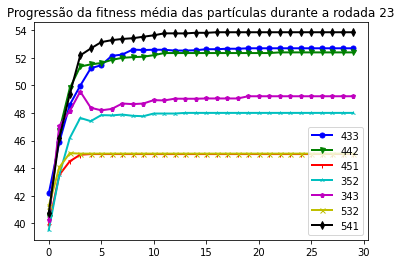

Resultados da rodada 23
Pontuação Máxima: 59.97 | Custo: 124.82 | Formação: 433
---------------------------------------------------------------------------


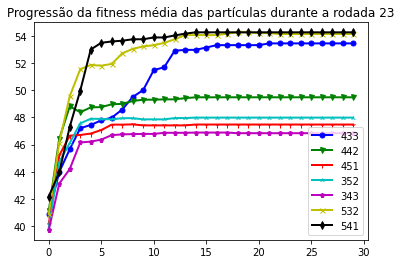

Resultados da rodada 23
Pontuação Máxima: 64.18 | Custo: 137.04 | Formação: 541
---------------------------------------------------------------------------


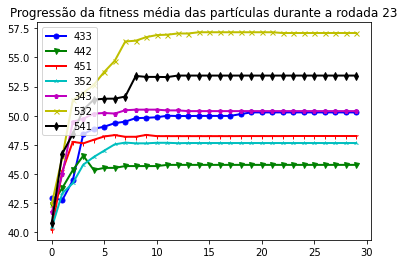

Resultados da rodada 23
Pontuação Máxima: 65.96 | Custo: 137.26 | Formação: 532
---------------------------------------------------------------------------


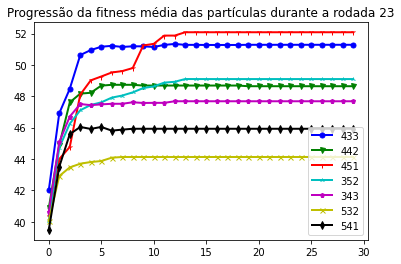

Resultados da rodada 23
Pontuação Máxima: 60.68 | Custo: 113.95 | Formação: 433
---------------------------------------------------------------------------


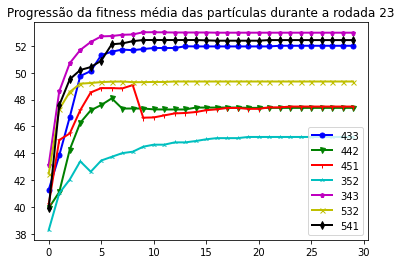

Resultados da rodada 23
Pontuação Máxima: 62.26 | Custo: 140.46 | Formação: 343
---------------------------------------------------------------------------


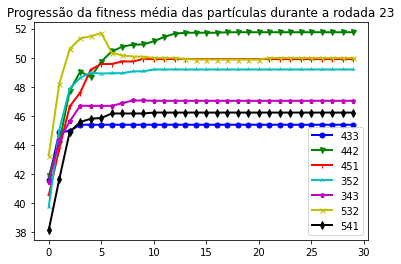

Resultados da rodada 23
Pontuação Máxima: 60.44 | Custo: 117.43 | Formação: 532
---------------------------------------------------------------------------


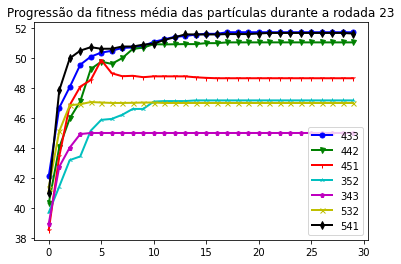

Resultados da rodada 23
Pontuação Máxima: 60.22 | Custo: 142.12 | Formação: 451
---------------------------------------------------------------------------
Média da pontuação: 61.678 | Desvio padrão da pontuação: 1.89
Média da pontuação real: 48.980000000000004 | Desvio padrão da pontuação real: 7.38
Média do custo: 126.71100000000001 | Desvio padrão do custo: 10.66


In [45]:
pts = []
r_pts = []
custo = []
for i in range(10):
    num_cartoletas, rodadas, max_iteracoes, num_particulas, c1, c2 = 180, [23], 30, 30, 4, 2.05
    pso = PSO()
    pts.append(pso[0].fit)
    r_pts.append(pso[0].real_fit)
    custo.append(pso[0].preco)
print('Média da pontuação:',sum(pts)/len(pts),'| Desvio padrão da pontuação:',round(np.std(pts),2))
print('Média da pontuação real:',sum(r_pts)/len(r_pts),'| Desvio padrão da pontuação real:',round(np.std(r_pts),2))
print('Média do custo:',sum(custo)/len(custo),'| Desvio padrão do custo:',round(np.std(custo),2))

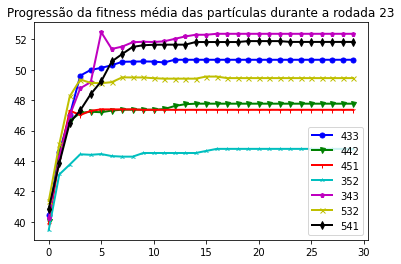

Resultados da rodada 23
Pontuação Máxima: 61.19 | Custo: 124.2 | Formação: 532
---------------------------------------------------------------------------


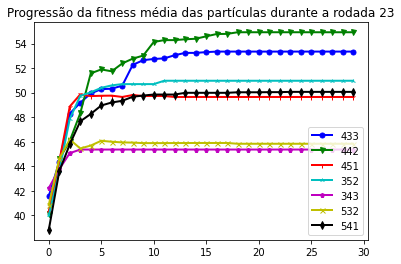

Resultados da rodada 23
Pontuação Máxima: 60.15 | Custo: 118.29 | Formação: 442
---------------------------------------------------------------------------


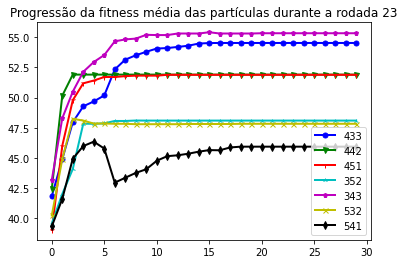

Resultados da rodada 23
Pontuação Máxima: 64.05 | Custo: 133.44 | Formação: 433
---------------------------------------------------------------------------


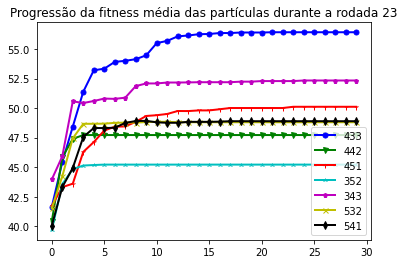

Resultados da rodada 23
Pontuação Máxima: 62.51 | Custo: 125.96 | Formação: 433
---------------------------------------------------------------------------


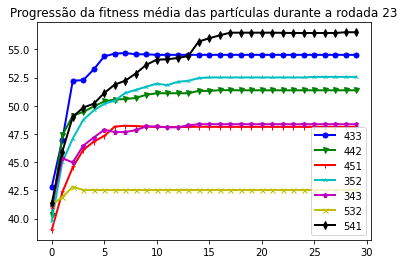

Resultados da rodada 23
Pontuação Máxima: 64.25 | Custo: 127.8 | Formação: 433
---------------------------------------------------------------------------


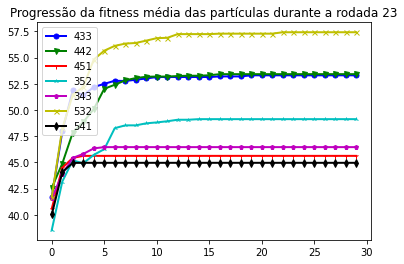

Resultados da rodada 23
Pontuação Máxima: 66.88 | Custo: 141.44 | Formação: 532
---------------------------------------------------------------------------


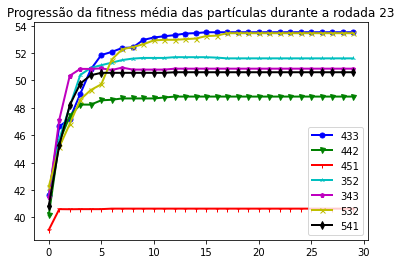

Resultados da rodada 23
Pontuação Máxima: 59.64 | Custo: 120.97 | Formação: 433
---------------------------------------------------------------------------


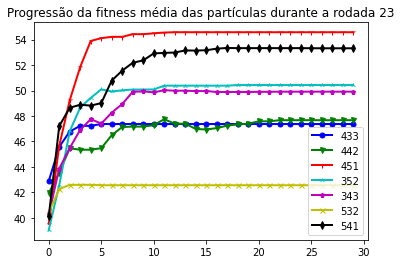

Resultados da rodada 23
Pontuação Máxima: 61.2 | Custo: 132.25 | Formação: 541
---------------------------------------------------------------------------


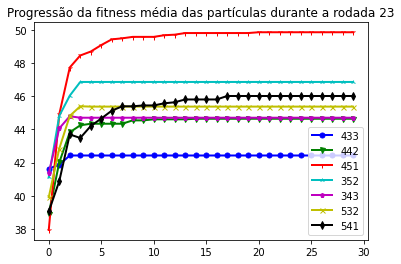

Resultados da rodada 23
Pontuação Máxima: 58.19 | Custo: 112.6 | Formação: 352
---------------------------------------------------------------------------


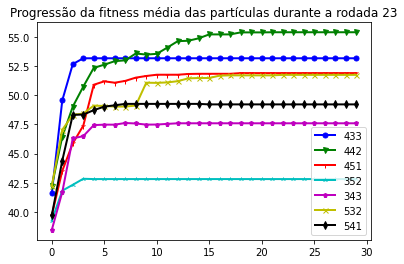

Resultados da rodada 23
Pontuação Máxima: 62.68 | Custo: 131.04 | Formação: 433
---------------------------------------------------------------------------
Média da pontuação: 62.07399999999999 | Desvio padrão da pontuação: 2.42
Média da pontuação real: 49.63100000000001 | Desvio padrão da pontuação real: 9.28
Média do custo: 126.799 | Desvio padrão do custo: 7.89


In [46]:
pts = []
r_pts = []
custo = []
for i in range(10):
    num_cartoletas, rodadas, max_iteracoes, num_particulas, c1, c2 = 270, [23], 30, 30, 4, 2.05
    pso = PSO()
    pts.append(pso[0].fit)
    r_pts.append(pso[0].real_fit)
    custo.append(pso[0].preco)
print('Média da pontuação:',sum(pts)/len(pts),'| Desvio padrão da pontuação:',round(np.std(pts),2))
print('Média da pontuação real:',sum(r_pts)/len(r_pts),'| Desvio padrão da pontuação real:',round(np.std(r_pts),2))
print('Média do custo:',sum(custo)/len(custo),'| Desvio padrão do custo:',round(np.std(custo),2))